To be put into order
1. Summary
2. Introduction
3. Technologies and Techniques
4. Results
    - How much energy is currently curtailed annually across the Orkney Isles?
5. Discussion
    - How much can this be reduced by different levels of DR penetration?
    - How many local households would need to be on our DR scheme in order to supply this level of DR?
6. References
7. Appendix

# 1. Summary
Wind turbines in the industrial field usually limit the output power at a power set-point, which is always below the optimal operating condition. 

# 2. Introduction

# Objective
Effective use of curtailed power and find business opportunity, analyzing viability of business proposition to go / no go.

If we can control demand, we may be able to use it to balance the system instead of curtailing
generators. This could provide a number of benefits: 
- it would reduce wastage of renewable energy and thus increase the fraction of energy generated by renewables within the UK;
- it could provide access to cheaper energy for local consumers on Orkney, reducing fuel poverty and linking locals to the benefits of wind turbine development on the isles;
- it would increase the revenue of generators close to the top of the curtailment order and therefore improve the business case for building new (marginal) generators;
- it could help to avoid more costly network capacity upgrades, which would be an alternative solution to the curtailment problem


# Hypotheses
1. There is sizable wasted power due to curtailment.
2. There will be physically sufficient room for power storage which absorbs redundant power which otherwise curtailed. 
3. Value of such curtailed power is large enough to be shared among households and the company, and additional investment for batteries, hot water storage can be paid back in 3 years.(for example)
4. High wind speed + Low demand results in higher curtailment. For instance, more windy days during autumn and winter, and during nights and midnights. However, not much demand in midnights which could possibly cause higher curtailments in all seasons.
5. Low wind speed + High demand results in lower curtailment. For instance, demands during nights could be higher, but in summer time wind speed is generally lower, which could result in lower curtailments.
6. Due to the geographical location, Orkney never lack of wind and sometimes could be very windy with gusts even in summer. Therefore, we may not be able to see a clear seasonal trend of curtailment.

# brief overview of the approach used in your analysis
......




# 3. Technologies and techniques

........


## 3.1 Assumptions:
1. Wind velocity pattern and mean demand stay the same level as those of data explored. 
2. Electricity price :   XX pounds/kWh
3. 500+ turbines in Orkney, but due to different exact locations the energy generation could vary, either ups or downs. We assumed multiplying the given turbine data by 500 could get a very close result to the exact figures.

Q: What to do with power > set point?

Q: What should we do with Null Power_kw, Setpoint_kw, Wind_ms? Remove from dataset?
Setpoint should never includes NA because they're system control????.....
Wind should never includes NA because that's not natural, but 0.xx could be possible but just can't read by the computer system
power kW never includes NA because of the reason above (wind never 0), and 1 minute interval is just too much that's why some 0 recorded
Therefore, we removed the records from dataset

Q: What should we do with 0 Power_kw, Setpoint_kw, Wind_ms? Remove from dataset?
check the figures and get back to Horri
should include these in our figures because households demand are quite low sometimes
Power -ve: change them to 0 and keep all 0
Setpoint 0: remove
wind 0: remove


###### Supply excel
Missing data

2015 data are not completed, but not faulty. We'll drop 2015 data in plotting some graphs.
Some 2017-04 data missing, but it's alright as we have 2016's
Q: Should we remove Power_kW above setpoint?

Yes, omit them in data analysis part. These are special cases .... due to inertia ... 0 setpoint set but the turbine can't stop immediately. Safe to omit. Can't include these in curtailment calculation ......
Remove everything Power_kw>setpoint. But still include power kw <= setpoint

## 3.2 Curtailed power (kW) and Curtailed energy (kWh)

## 3.2.1 Choosing blade length for potential power calculation
Potential power (kW) = 0.5 * air density 1.23 * (pi * blade length^2) * (wind speed^3) * Power coefficient 0.4 / 1000
We use power coefficient 0.4 because ......

We tried to find the blade length where the potential power generated is the closest to the actual power ...... power points bounced evenly around the 26 curve....

Vertical line wind speed 12m/s is plotted to show us .....

Length = 26m is the best fitted

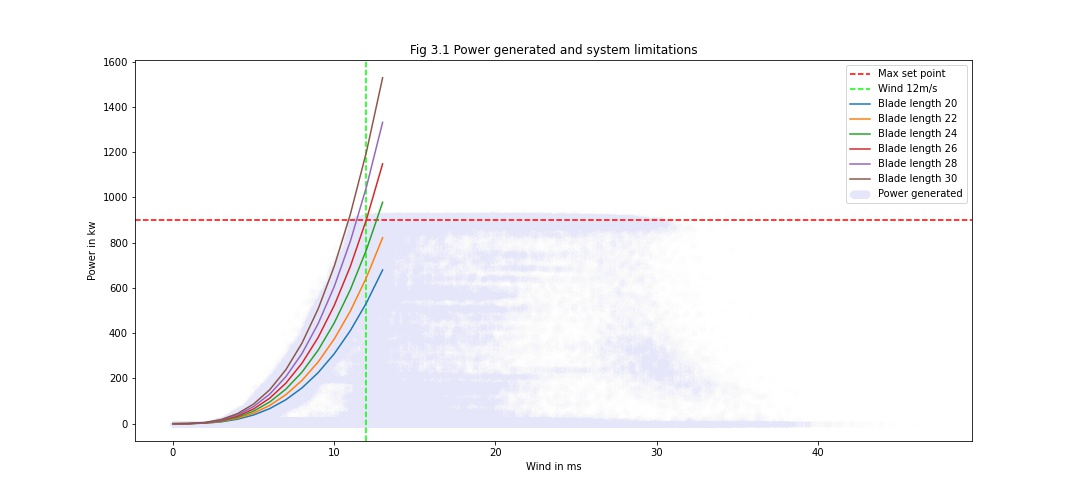

## 3.2.2 Curtailed power (kW)

#### What is curtailed power?
How $strong$ the current is ......

#### Curtailed power equation
curtailed power (kW) = potential power - total power consumed.

Also equals to potential power - setpoint in this case study because setpoint of this turbine indicates whether the turbine is being forcibly curtailed by the network operator

where,

- potential power in terms of single turbine = 0.5 * 1.23 * (pi * 26^2) * wind speed ^3 * 0.4 / 1000

## 3.2.3 Curtailed energy (kWh)

#### What is curtailed energy?
How $much$ energy actually curtailed....
We are interested in curtailed energy, not curtailed power because electricity provider charge us in terms of energy, not power.

- Energy: aggregate to area in time chart

#### Curtailed energy equation
Curtailed energy in one minute (kWh) = curtailed power * 60 sec x 0.278 x 10^-3 

## 3.2.4 Curtailment computation
Data used:
- df_supply: Drop NA and 0 records except 0 Power_kW
- df_demand: Drop 2018 and household number outliers
- Energy supply and demand should be quite constant in particular months across year, summer months should have less wind than winter months. Therefore, it is alright to have different years of supply and demand data, we can take the averages by months regardless year for curtailment calculation.

Columns:
- Timestamp
- Power_kw:	average power in kW during the measurement period
- Setpoint_kw:	the mean maximum-allowed generator output during the measurement period
- Wind_ms:	mean wind speed at the turbine during the measurement period.
- Potential_power_kw:	potential energy of single turbine = 0.5 * 1.23 * (pi * 26^2) * wind speed ^3 * 0.4 / 1000
- Curtailed_power_kw: potential power - total power consumed 
- Curtailed_energy_in_1_minute_kwh:	Aggregated power in 1 minute. curtailed power * 60 sec x 0.278 x 10^-3 

## 3.3 OLS regression

Model explainations


# 4. Results

### 4.1.1 Low demands
In general, most households need 0.2-0.3kW and around 0.1 kW per minute throughout the year. Two dinstinct level of demands could possibly due to demands during different hours in a day. During midnights, 0.1kW demand becuase they're sleeping. While during dinner time that everyone back to home after work or school, 0.2-0.3kW needed for meals preparation, heaters, lights and hot water etc. 

From below figure (Fig 4.1), it shows that demand in Jan (coldest days in winter) is highest, and dropped constantly until Jul and Aug (hottest days in summer), then rose again and reached highest in Jan. The higher electricity demand could be related to more heating needs during cold hours.

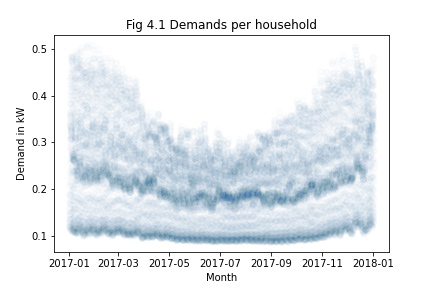

Monthly demand per household (Fig 4.2) is the highest in Winter (over 200 kWh) and lowest in Summer (less than 140 kWh). This again, is reasonable due to more electricity for lightings or heatings during winter.

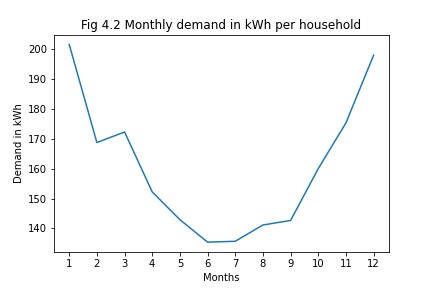

#### 4.1.1.1 Average demand in Scotland
According to Table 2 in https://great-home.co.uk/average-electricity-gas-bills-in-2019/, average Energy Monthly Consumption in Scotland was 308kWh as shown in this table:
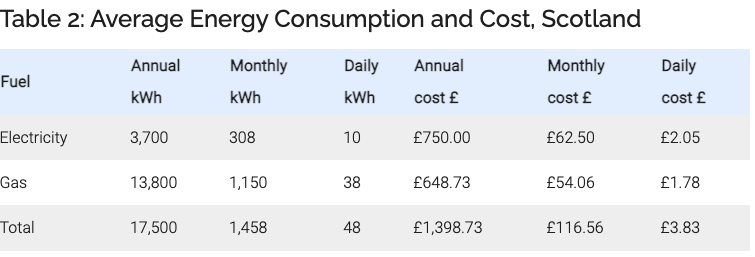

which is about 2 times more than Orkney average electricity demands:

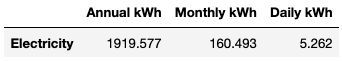

### 4.1.2 Windiest parts in the UK thus causing more curtailment

According to Metoffice statistics https://www.metoffice.gov.uk/weather/learn-about/weather/types-of-weather/wind/windiest-place-in-uk, Orkney island is one of the top windiest parts in the UK.

Fig 4.4 show that curtailment happens most between wind speed 7-25m/s. The pie chart shows that 64.9% of data is within that range. 

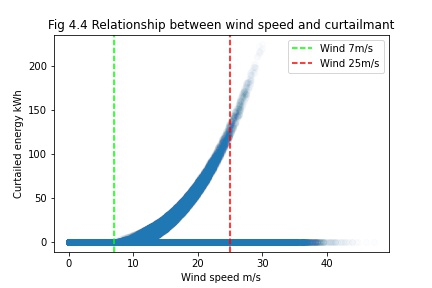

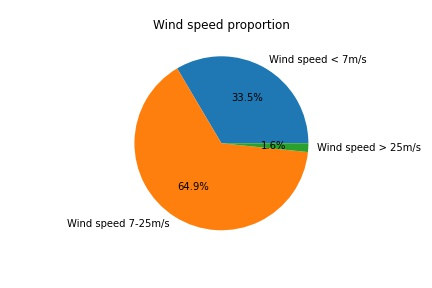

### 4.1.3 Power usage and generation pattern 

#### 4.1.3.1 Average Wind speed pattern:

1. Winter (Nov - Feb): highest
2. Summer (May - Aug): lowest
3. Spring and Autumn: moderate
4. Not much differences in terms of hours

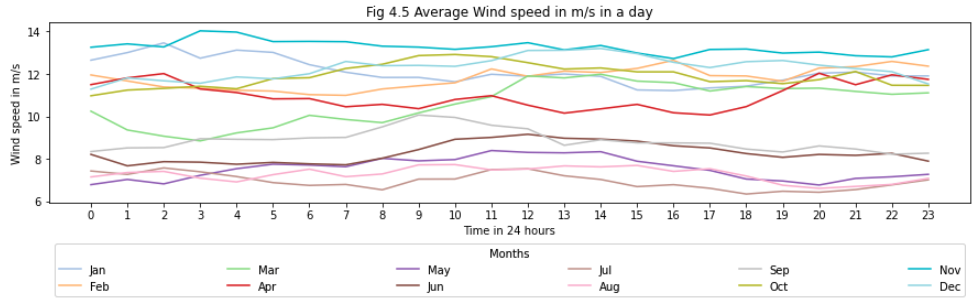

#### 4.1.3.2 Average Demand pattern:

1. 0am-5am: low, sleeping
2. 5am-7am: start rising coz time to wakeup
3. 7am-3pm: constant coz people in office/ school, maybe just one person at home watching TV or doing houseworks.
4. 3pm-5pm: rise, peak at 5pm. People off work/ school, back to home and start using electricity like TV, computer, lights.... Winter time has higher peak beacuase the period is colder which we use more heaters, and dark earlier thus use light earlier, therefore draw a higher demand during 5pm-11pm
5. 6pm-11pm dropping: Night life outside, time to sleep

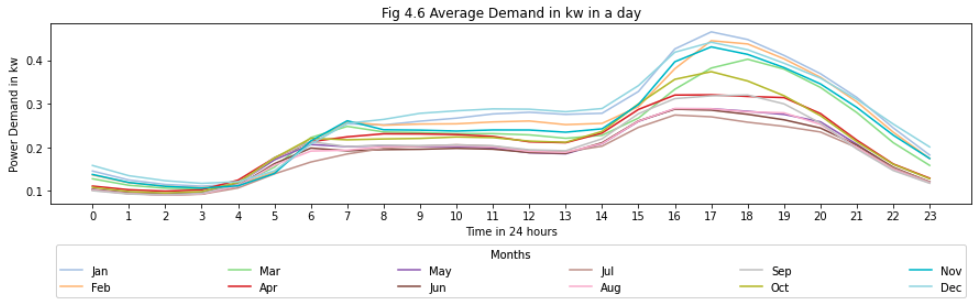

#### 4.1.3.3 Average Curatiled energy:


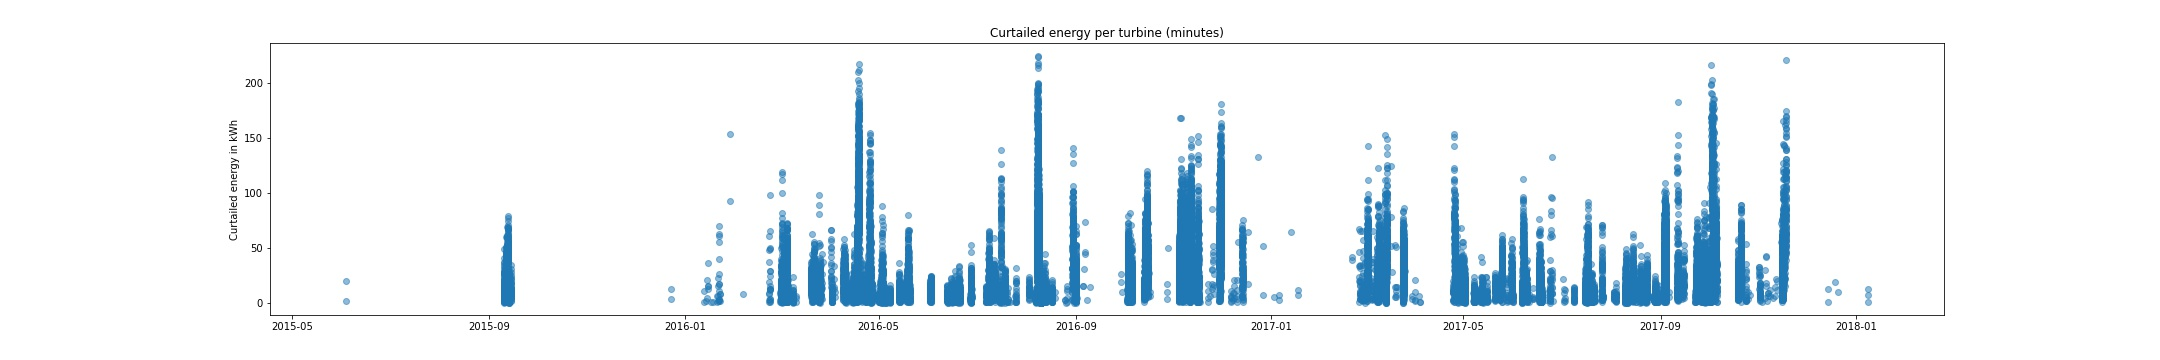

As shown in Fig 4.7, we don't see any obvious pattern across the year, which is as expected because curtailed energy is calculated from potential power and power generated which is affected by both demand and wind speed, and also other factors suc as power loss which was not recorded. 

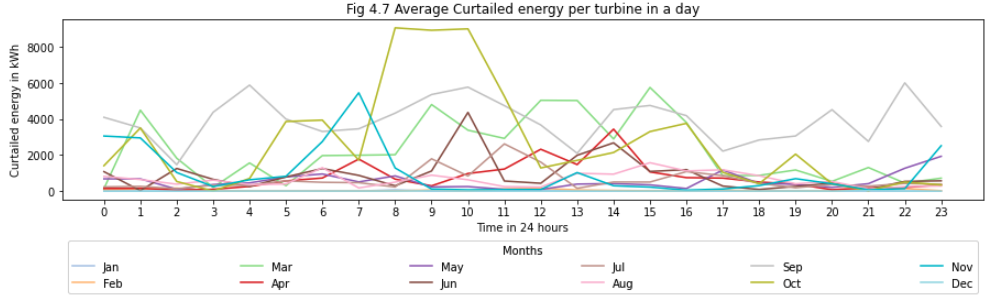

Potential power is positively correlated with wind speed. Power generated is positively correlated with both demand and wind speed. With constant demand, an increase in wind speed will cause curtailment increase and vice versa. 

(to be deleted / changed)

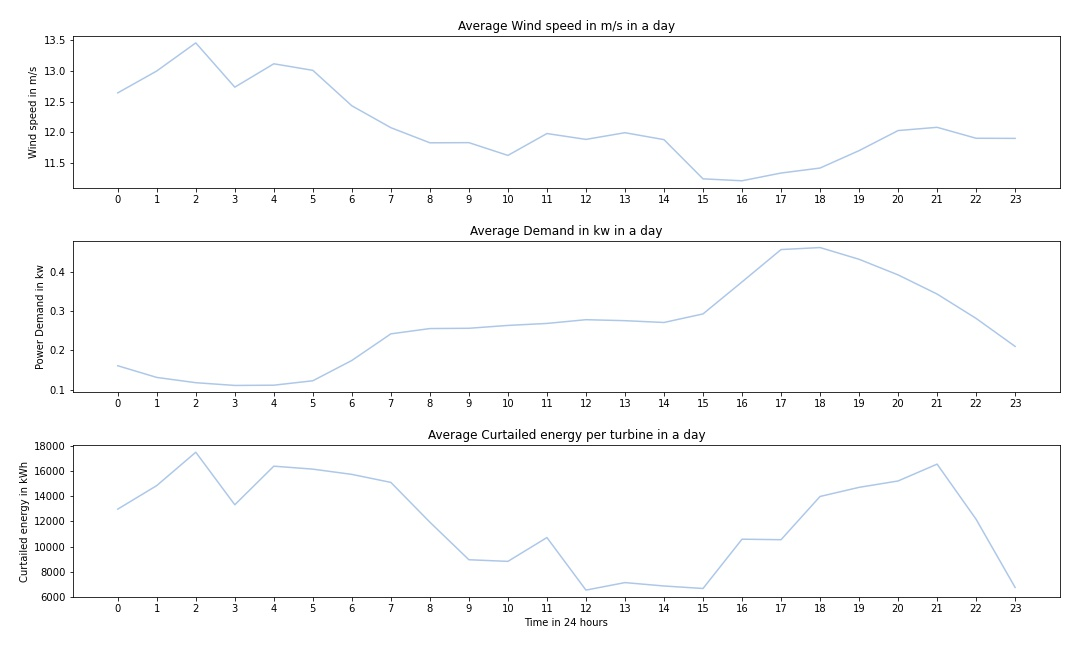

### 4.1.4 How much energy is currently curtailed annually across the Orkney Isles?

Annual curtailment of 500 wind turbines was 298,993,946kWh and 161,291,575kWh in 2016 and 2017 respectively. The massive curtailment caused 20+ millions GBP revenue loss annually.

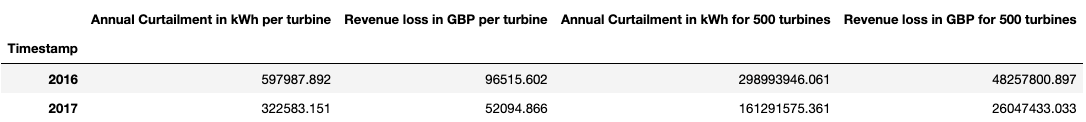

# 5. Discussion

## 5.1 Summary of the overall trend of the findings
From the results, electricity demand is 2 times lower than Scotland average, residents probably use more other power sources. The high average wind speed plus such a low electricty demand causes high curtailment thus high revenue loss.

## 5.2 Was the initial hypothesis correct?

## 5.3 An explanation of any errors

## 5.4 Strengths and Limitations of the Analysis

## 5.5 How much can this be reduced by different levels of DR penetration? How many local households would need to be on our DR scheme in order to supply this level of DR?

We have 22000 total households on the island as of 2017, so the maximum households we can penetrate DR to is 22000. In the trial period, we may want to start with fewer households i.e. 30 first to see if the DR devices cost could be covered in a few years.

Below table shows the average energy consumption and cost at Scotland (sources: https://great-home.co.uk/average-electricity-gas-bills-in-2019/) :
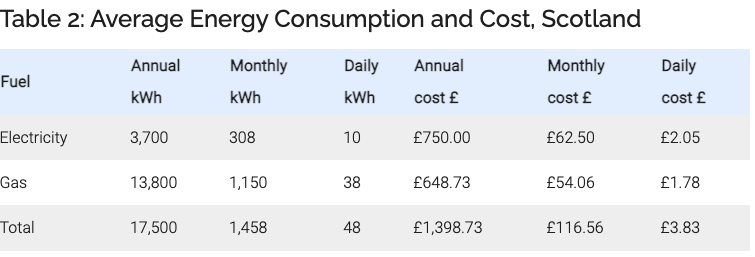

The average electricity monthly demand in Scotland is 308kWh, while Orkney was half of that (148kWh). The total energy consumption per household should not vary that much, therefore Orkney residents might be using far more gas than Scotland average. After installing DR devices, we could expect increase in demand to meet the average, and possibly also shift some gas usage to electricity, with the total overall energy usage unchanged.

We have several choices of power storage installation:
1. Battery storage for electricity energy:
    - According to https://www.cse.org.uk/advice/renewable-energy/battery-storage, 'On average installing a battery will cost £4,000-£8,000, with a useable capacity of 3.8-13.5 kWh'. Assume that to support daily usage of 5kWh (Orkney daily average) or 10kWh (Scotland daily average), we need a £5,000 or £6,500 battery storage respectively.
    
2. Storage heater to replace gas:
    - The storage capacity of a storage heater https://www.dimplex.co.uk/product/quantum-hhr-storage-heater is 15.54kWh which can cover daily usage, costs £858.10. The energy needed exceeds daily average of demand per household 4.869kWh, so probably residents are using gas for heater, thus installing this could shift their energy usage from gas to wind. 

3. Hot water tank to replace gas:
    - According to https://www.ccwater.org.uk/households/using-water-wisely/averagewateruse/, a shower uses 8 litres per minute on average. Assuming that all households have 3 residents, each of them take 10 minutes for a shower, they need 240 litres of hot water for shower per day. With references to https://www.sust-it.net/immersion-heater-energy-calculator.php, 240 litres of hot water needs 12.5kWh energy per day. If we install a 210Ltrs 6kW immersion water heater, for example, https://www.shop4-waterheaters.co.uk/product.php/393405286/heatrae_sadia_95_050_468_megaflo_eco_210dd_white_stainless_steel_direct_unvented_cylinder_style_water_heater_with_2_x_3kw_immersion_elements_210ltrs_6kw?search_query=Megaflo+210+ltrs&results=75, it costs £ 1,117.42. The energy needed for shower is 12.5kWh, which exceeds the daily average of demand per household 4.869kWh, so probably residents are using gas for hot water, thus installing this could shift their energy usage from gas to wind. 

##### How much gas could be shift to wind energy through installing storage heater and hot water tank?
1. Assume storage heater annual usage 15.54kWh * 30 * 4 = 1864.8kWh (4 months winter usage)
2. Assume annual hot water usage 12.5kWh * 365 = 4562.5kWh
3. The ballpark allowable gas shift is (1864.8 + 4562.5)/13800 = 46.6%

Therefore, curtailment could be reduced further and calculated in following cases:
1. Number of households * Orkney annual demands
2. Number of households * Scotland annual electricity demands
3. Number of households * Scotland annual electricity + 46% gas demands
4. Number of households * Scotland annual 46% gas demands

After DR rollout and if proved demand could increase, we could start charging customers. If the cost could be compensated within 6 years of trial (5 years after charging), we'll go for the plan. 6 years as the cut off point because we don't want to risk for the cost of appliances maintenance. Assume that gas and electricity cost the same.

### 5.5.1 Plan A: installing battery storage, based on Orkney eletricity demand
This is not profitable in 6 year, we don't suggest this direction.
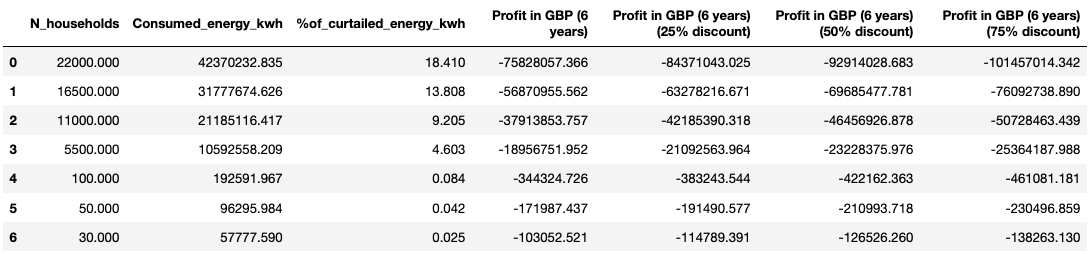

### 5.5.2 Plan B: installing battery storage, based on Scotland electricity demand 
This is not profitable in 6 year, we don't suggest this direction.
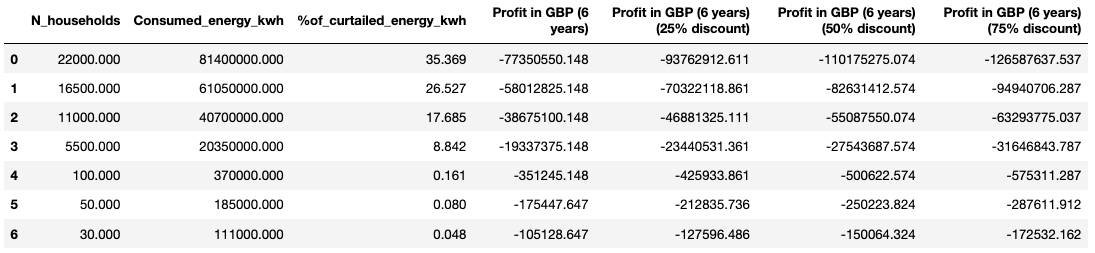

### 5.5.3 Plan C: installing battery storage + storage heater + hot water tank, based on Scotland electricity + 46% gas demand 
This is not profitable in 6 year, we don't suggest this direction.
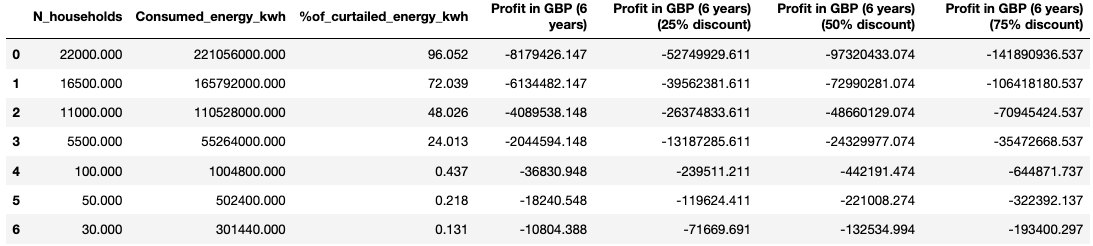

### 5.5.3 Plan D: installing storage heater + hot water tank, based on Scotland 46% gas demand 
Among all four plans, this is the only plan that is profitable in 6 years, and can do even with 50% discount. Therefore, in the DR trial, we should target to replace at least 46% gas demands by installing storage heater with 15.54kWh capacity, and 210Ltrs 6kW hot water tank, with total cost per household around £1,975.52. Once we proved during trial period of 30 households demands increased and consumed expected amount of energy, we could rollout this plan to more households to use up more curtailed enery. 

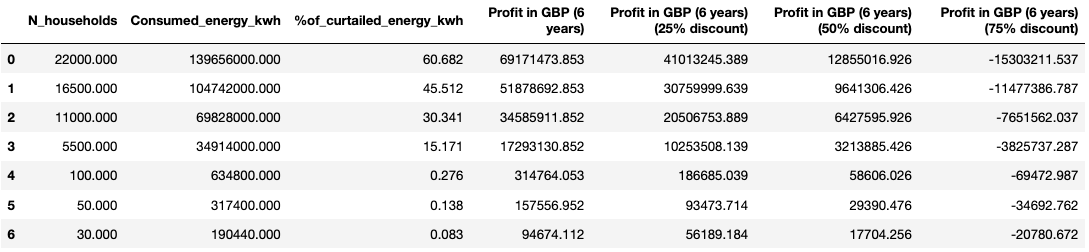

# 6. References

# 7. Appendix

## 7.1 Data import

### 7.1.1 Importing residential_demand.csv 
The dataset residential_demand.csv is successfully imported and named df_demand. No null or 0 records is found. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# stop warning messages
import warnings
warnings.filterwarnings('ignore')

# show full number, not scientific
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df_demand = pd.read_csv('residential_demand.csv',parse_dates=['Timestamp'], infer_datetime_format= True)
df_demand.head(3)

Timestamp  Demand_mean_kw  N_households
0 2017-01-01 00:00:00           0.220          5428
1 2017-01-01 00:30:00           0.206          5429
2 2017-01-01 01:00:00           0.189          5429

In [3]:
# To check any null data
df_demand.isnull().describe()

Timestamp Demand_mean_kw N_households
count      17568          17568        17568
unique         1              1            1
top        False          False        False
freq       17568          17568        17568

In [4]:
# To check any 0 data
df_demand.describe()

Demand_mean_kw  N_households
count       17568.000     17568.000
mean            0.219      8630.642
std             0.090      2999.142
min             0.087      5406.000
25%             0.144      6781.000
50%             0.212      8190.500
75%             0.274      9652.000
max             0.510     30037.000

### 7.1.2 Importing turbine_telemetry.csv
The wind turbine power generation dataset turbine_telemetry.csv is imported and named df_supply. Null and 0 vaules are found in Power_kw, Setpoint_kw and Wind_ms. Setpoint as system control should never be null or 0 or will cause system failure otherwise. Wind will at least be recorded 0m/s when the wind speed is too low that system can't detect, but the geographical location making Orkney Island almost impossible to get 0m/s wind speed, thus both null and 0 wind speed should be dropped. Power can't be null when wind speed is always positive, but can possibly be 0 becuase customers could have no demand during midnight, although its nearly impossible to happen we still include this possibility in our analysis. 

In [5]:
df_supply = pd.read_csv('turbine_telemetry.csv',parse_dates=['Timestamp'], infer_datetime_format= True)
df_supply.head(3)

Timestamp  Power_kw  Setpoint_kw  Wind_ms
0 2015-05-28 00:00:23    80.000      900.000    4.900
1 2015-05-28 00:01:23    78.000      900.000    5.400
2 2015-05-28 00:02:23    52.000      900.000    4.900

In [6]:
# To check any null data
# 2 unique values mean True and False exists in checking null, thus null exists.
df_supply.isnull().describe()

Timestamp Power_kw Setpoint_kw  Wind_ms
count    1069636  1069636     1069636  1069636
unique         1        2           2        2
top        False    False       False    False
freq     1069636  1066934     1066921  1066931

In [7]:
# To check any 0 data shown
# Min get a zero value means 0 data exists.
df_supply.describe()

Power_kw  Setpoint_kw     Wind_ms
count 1066934.000  1066921.000 1066931.000
mean      367.187      810.658       9.955
std       339.964      261.507       5.454
min         0.000        0.000       0.000
25%        51.000      900.000       6.100
50%       251.000      900.000       9.000
75%       704.000      900.000      12.400
max       938.000      900.000      47.200

## 7.2 Visualising raw data see any obvious trends or missing data

### 7.2.1 Households demands (df_demand)

In [8]:
# Becuase the recorded time is the end of the time, Timestamp -1s to correct the hour of measurment
df_demand.Timestamp = df_demand.Timestamp - dt.timedelta(seconds=1)

# Becuase 2016 only have one data, we ignore this.
df_demand = df_demand[df_demand.Timestamp.dt.year != 2016]
df_demand.head(3)

Timestamp  Demand_mean_kw  N_households
1 2017-01-01 00:29:59           0.206          5429
2 2017-01-01 00:59:59           0.189          5429
3 2017-01-01 01:29:59           0.173          5429

<AxesSubplot:xlabel='Timestamp,Timestamp'>

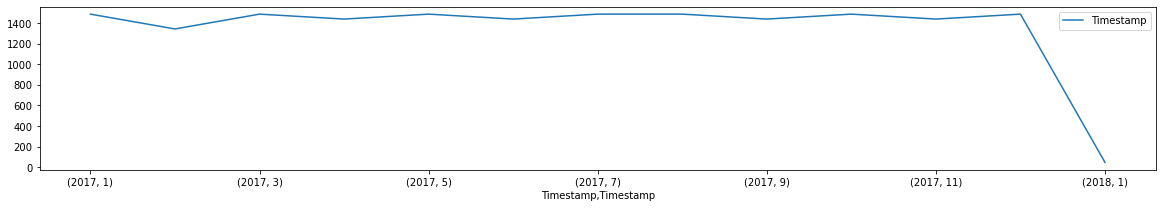

In [9]:
# check if number of data is constant in all months
# constant in all months except 2018. So we'll ignore 2018 in analysis.
df_demand.groupby([df_demand.Timestamp.dt.year,df_demand.Timestamp.dt.month]).count().iloc[:,:1].plot(figsize=(20,3))

In general, most households need 0.2-0.3kW and around 0.1 kW per minute throughout the year. Two dinstinct level of demands could possibly due to demands during different hours in a day. During midnights, 0.1kW demand becuase they're sleeping. While during dinner time that everyone back to home after work or school, 0.2-0.3kW needed for meals preparation, heaters, lights and hot water etc. 

From below figure, it shows that demand in Jan (coldest days in winter) is highest, and dropped constantly until Jul and Aug (hottest days in summer), then rose again and reached highest in Jan. Higher electricity needs could be related to  heater operations during cold hours.

Monthly demand per household is the highest in Winter (395kW) and lowest in Summer (270kW, 32% less). This again, is reasonable due to more electricity for heaters and lightings required during winter.

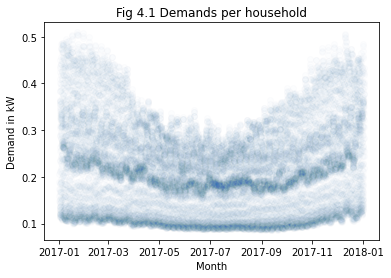

In [10]:
plt.scatter(df_demand['Timestamp'] , df_demand['Demand_mean_kw'], alpha=0.01)
plt.title('Fig 4.1 Demands per household')
plt.xlabel('Month')
plt.ylabel('Demand in kW')

plt.savefig('./img/Fig 4.1 Demands per household scatter.jpg')
plt.show()

In [11]:
print('Average demand during 0am-5am: ',df_demand[df_demand.Timestamp.dt.hour.isin(np.arange(0,6))].mean()[0])
print('Average demand during 6am-7am: ',df_demand[df_demand.Timestamp.dt.hour.isin(np.arange(6,8))].mean()[0])
print('Average demand during 8am-3pm: ',df_demand[df_demand.Timestamp.dt.hour.isin(np.arange(8,16))].mean()[0])
print('Average demand during 4pm-5pm: ',df_demand[df_demand.Timestamp.dt.hour.isin(np.arange(16,18))].mean()[0])
print('Average demand during 6pm-11pm: ',df_demand[df_demand.Timestamp.dt.hour.isin(np.arange(18,24))].mean()[0])

Average demand during 0am-5am:  0.11690719932291514
Average demand during 6am-7am:  0.21526142114697733
Average demand during 8am-3pm:  0.2338015407337872
Average demand during 4pm-5pm:  0.3497033189065092
Average demand during 6pm-11pm:  0.2594064493140798


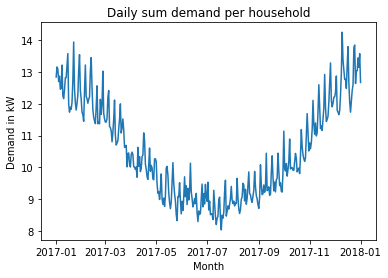

In [12]:
# daily demand sum
df_demand.groupby(df_demand.Timestamp.dt.date).sum()['Demand_mean_kw'].plot()
plt.title('Daily sum demand per household')
plt.xlabel('Month')
plt.ylabel('Demand in kW')

plt.show()

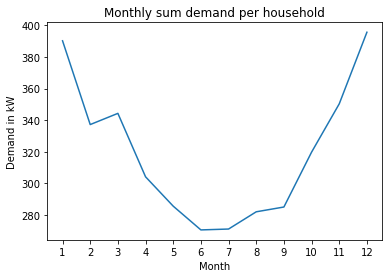

In [13]:
# monthly demand sum
df_demand.groupby(df_demand[df_demand.Timestamp.dt.year == 2017].Timestamp.dt.month).sum()['Demand_mean_kw'].plot()
plt.xticks(range(1,13))
plt.title('Monthly sum demand per household')
plt.xlabel('Month')
plt.ylabel('Demand in kW')

plt.show()

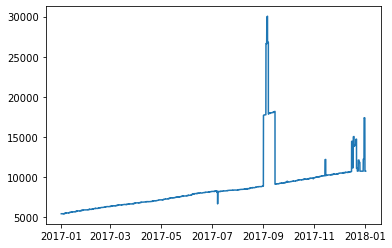

In [14]:
plt.plot(df_demand['Timestamp'] , df_demand['N_households'])

<AxesSubplot:ylabel='N_households'>

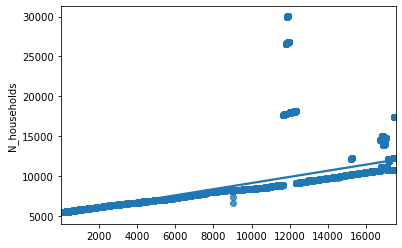

In [15]:
sns.regplot(df_demand.index , df_demand['N_households'])

#### These 4 spikes / outliers data of number of households:
1. Number of households <8000 in 2017-07
2. Number of households >15000 in 2017-09
3. Number of households >10500 in 2017-11
4. Number of households >11000 in 2017-12

But since the number of households are just sample data who participtated in the survey, as long as the average demand has no out liers, the dataset is good to use. We can also assume that total number of households in 2017 is 22,000 on the island according to the governement figure https://www.nrscotland.gov.uk/files/statistics/council-area-data-sheets/orkney-islands-council-profile.html#table_pop_est and use this figure for our analysis.

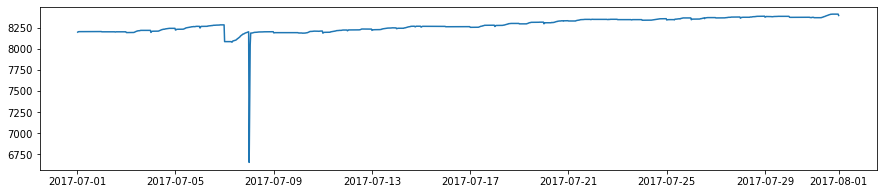

In [16]:
n=7
plt.figure(figsize=(15,3))
plt.plot(df_demand[df_demand['Timestamp'].dt.month == n]['Timestamp'], df_demand[df_demand['Timestamp'].dt.month == n]['N_households'])

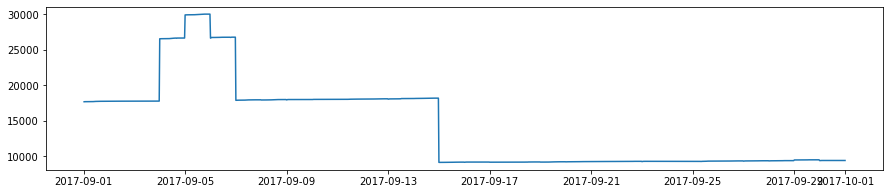

In [17]:
n=9
plt.figure(figsize=(15,3))
plt.plot(df_demand[df_demand['Timestamp'].dt.month == n]['Timestamp'], df_demand[df_demand['Timestamp'].dt.month == n]['N_households'])

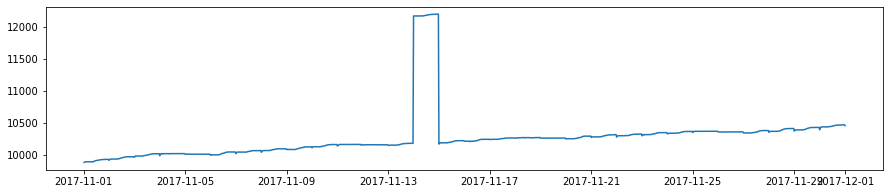

In [18]:
n=11
plt.figure(figsize=(15,3))
plt.plot(df_demand[df_demand['Timestamp'].dt.month == n]['Timestamp'], df_demand[df_demand['Timestamp'].dt.month == n]['N_households'])

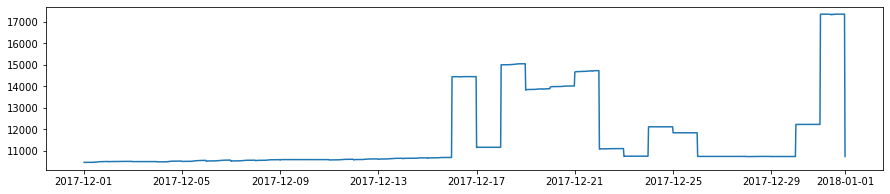

In [19]:
n=12
plt.figure(figsize=(15,3))
plt.plot(df_demand[df_demand['Timestamp'].dt.month == n]['Timestamp'], df_demand[df_demand['Timestamp'].dt.month == n]['N_households'])

## 7.2.2 Wind turbines generation (df_supply)

<AxesSubplot:xlabel='Timestamp,Timestamp'>

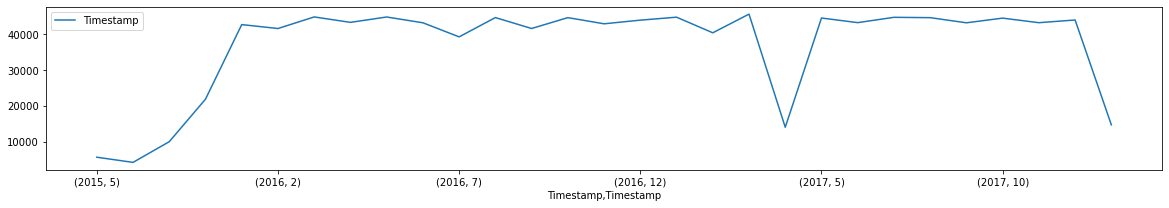

In [20]:
# check if number of data is constant in all months
# constant in all months except Apr 2017
df_supply.groupby([df_supply.Timestamp.dt.year,df_supply.Timestamp.dt.month]).count().iloc[:,:1].plot(figsize=(20,3))

Below we plotted the relationships between variables. The main findings would be some extra power generated beyound setpoint. Sometimes the setpoint is set to a lower point and the turbine should react accordingly, but the turbine can't stop immediately due to inertia. We'll still keep these records becuase these represent the actual power consumption. 

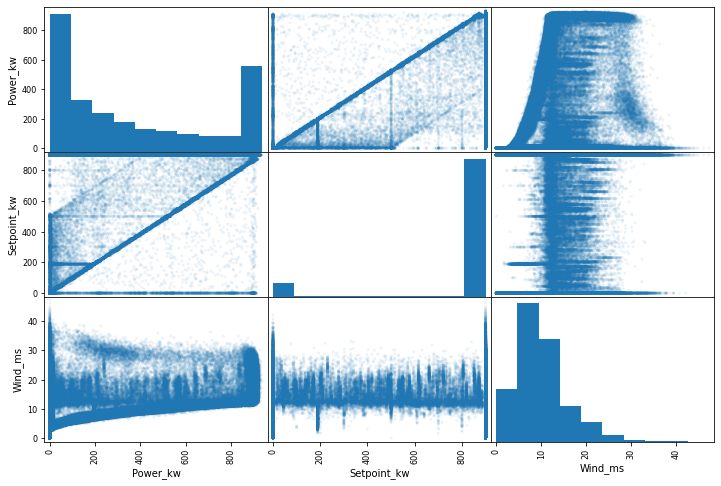

In [21]:
from pandas.plotting import scatter_matrix

#----------------------------------
#draw a scatterplot to look at the relationship of each variables
d=scatter_matrix(df_supply, figsize=(12,8),alpha=0.08)

Below scatterplot shows the power generation pattern. From the plot, we found missing data in 2015 and Apr 2017. In 2015, too few data for analysis so we'll simply drop all 2015 data in plotting some graphs later. Almost whole Apr 2017 data is missing, but since we have Apr 2016 data and the seaonsal pattern doesn't varies much, the missing data won't pose huge problem on our analysis. Same case for missing data in Oct 2016 .

Despite the missing data, it is observed that wind turbine generated 0-400 kW during summer (May - Sep) and 900 kW during winter (Nov-Feb). This matches with the demand pattern which has higher demand in winter and lower in summer.

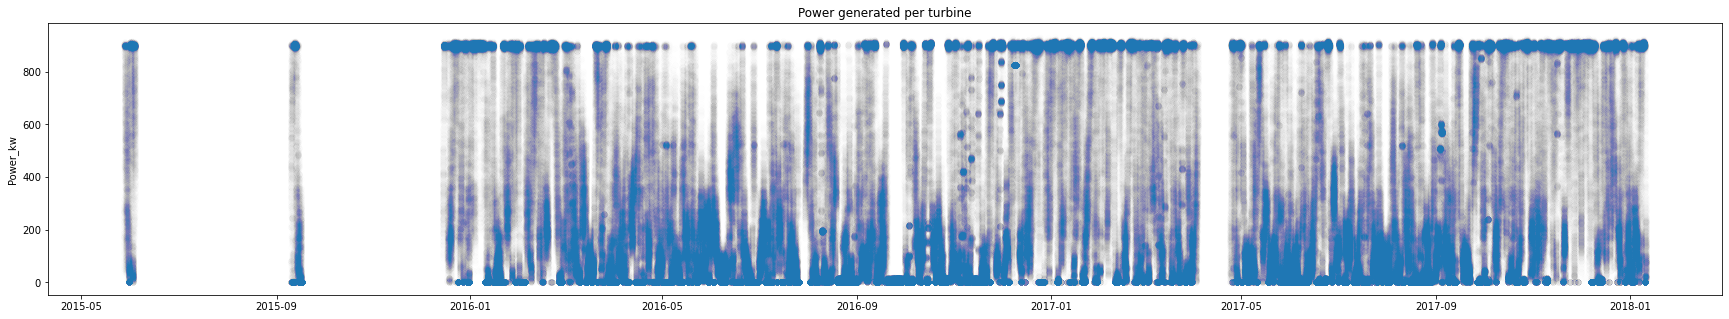

In [22]:
#----------------------------------
#draw a scatterplot to look at the power generation pattern

plt.figure(figsize=(30,5))
plt.scatter(df_supply['Timestamp'], df_supply['Power_kw'], alpha = 0.005)
plt.ylabel('Power_kw')
plt.title('Power generated per turbine')

plt.show()

Set point per turbine scatterplot below shows us that most of the time setpoint is 900kW. 

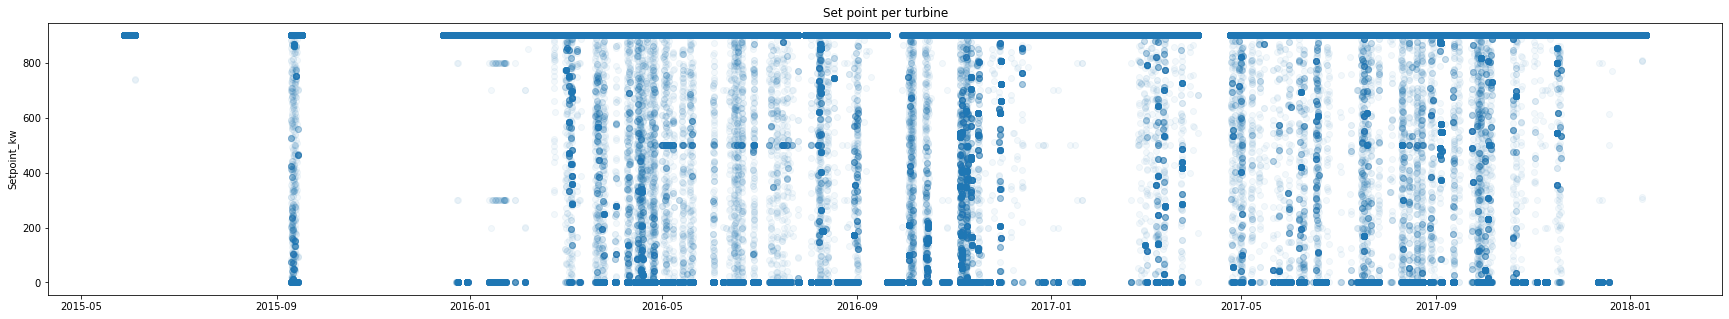

In [23]:
plt.figure(figsize=(30,5))
plt.scatter(df_supply['Timestamp'], df_supply['Setpoint_kw'], alpha = 0.05)
plt.ylabel('Setpoint_kw')
plt.title('Set point per turbine')

plt.show()

According to Metoffice statistics https://www.metoffice.gov.uk/weather/learn-about/weather/types-of-weather/wind/windiest-place-in-uk, Orkney island is one of the top windiest parts in the UK.

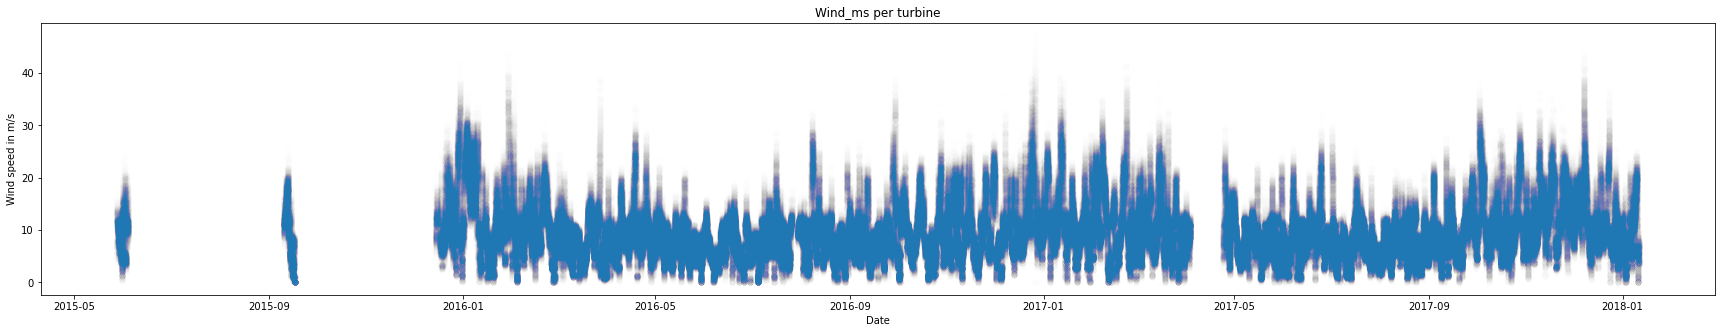

In [24]:
plt.figure(figsize=(30,5))
plt.scatter(df_supply['Timestamp'], df_supply['Wind_ms'], alpha = 0.003)
plt.xlabel('Date')
plt.ylabel('Wind speed in m/s')
plt.title('Wind_ms per turbine')

plt.show()

In [25]:
# 60% of record show wind speed >= 8m/s
tmp = pd.DataFrame(columns=['%'])
tmp.loc['Wind speed < 7m/s'] = len(df_supply[df_supply['Wind_ms'] < 7])/len(df_supply)
tmp.loc['Wind speed 7-25m/s'] = len(df_supply[df_supply['Wind_ms'] >= 7][df_supply['Wind_ms'] <= 25])/len(df_supply)
tmp.loc['Wind speed > 25m/s'] = len(df_supply[df_supply['Wind_ms'] > 25])/len(df_supply)

tmp

%
Wind speed < 7m/s  0.319
Wind speed 7-25m/s 0.662
Wind speed > 25m/s 0.016

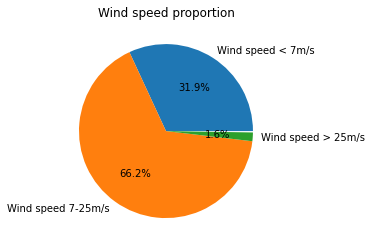

In [26]:
# pie chart here
plt.pie(tmp['%'], labels=tmp.index, autopct='%1.1f%%')
plt.title('Wind speed proportion')
plt.savefig('./img/Wind speed proportion.jpg')
plt.show()

#### 7.2.2.1 Check the trends again after omitting the unwanted data
Looks good as the overall trend remains.

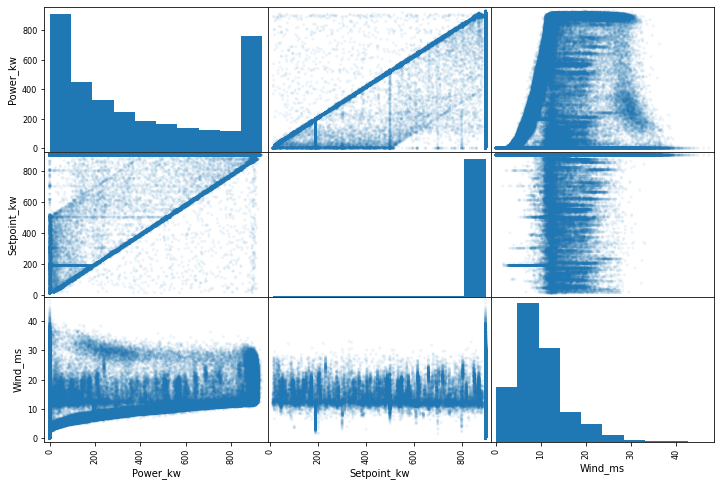

In [27]:
# drop all NA 
# drop 0 Setpoint_kw, 0 Wind_ms

df_supply = df_supply.dropna()[df_supply.Setpoint_kw != 0][df_supply.Wind_ms != 0]
d=scatter_matrix(df_supply, figsize=(12,8),alpha=0.08)

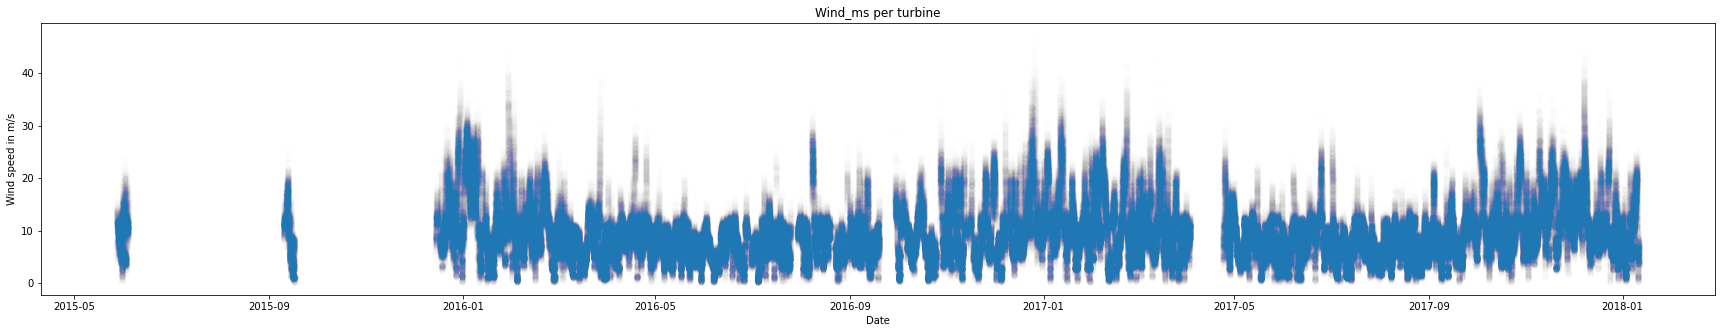

In [28]:
plt.figure(figsize=(30,5))
plt.scatter(df_supply['Timestamp'], df_supply['Wind_ms'], alpha = 0.003)
plt.xlabel('Date')
plt.ylabel('Wind speed in m/s')
plt.title('Wind_ms per turbine')

plt.show()

## 7.3 Choosing blade length for potential power calculation

#### Potential power (kW) = 0.5 * air density 1.23 * (pi * blade length^2) * (wind speed^3) * Power coefficient 0.4 / 1000
We use power coefficient 0.4 because ......

We tried to find the blade length where the potential power generated is the closest to the actual power ...... power points bounced evenly around the 26 curve....

Vertical line wind speed 12m/s is plotted to show us .....

Length = 26m is the best fitted 

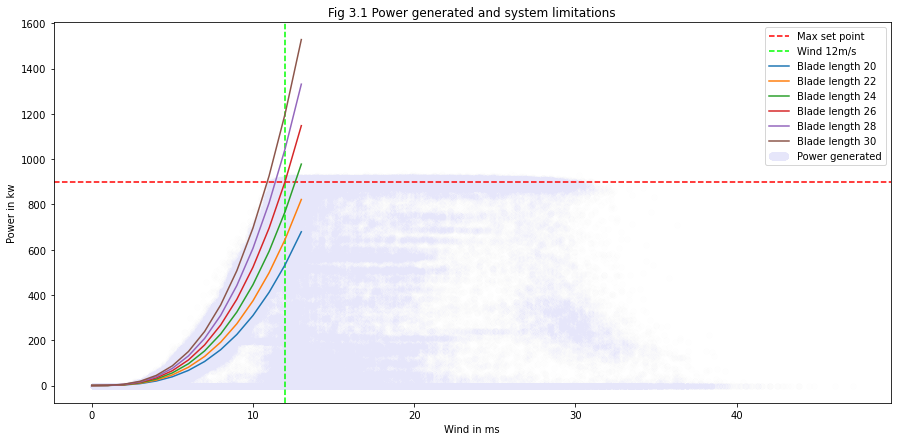

In [29]:
plt.figure(figsize=(15,7))

plt.scatter(df_supply['Wind_ms'],df_supply['Power_kw'], alpha=0.005, label='Power generated', color='lavender')
plt.axhline(y=900, color='r', linestyle='--', label='Max set point')
plt.axvline(12, color='lime', linestyle='--', label='Wind 12m/s')

# potential power curve
w = np.array(range(0,14)) # wind speed
length = range(20,31,2) # blade length in m
for l in length:
    potential_power=0.5*1.23*(np.pi*l**2)*(w**3)*0.4/1000
    plt.plot(potential_power, label='Blade length '+str(l))
    
plt.xlabel('Wind in ms')
plt.ylabel('Power in kw')
plt.title('Fig 3.1 Power generated and system limitations')
plt.legend(scatterpoints=1000)

plt.savefig('./img/Fig 3.1 Power generated and system limitations.jpg')
plt.show()

### 7.3.1 Curtailed power (kW)

#### 7.3.1.1 What is curtailed power?
How $strong$ the current is ......

#### 7.3.1.2 Curtailed power equation
curtailed power (kW) = potential power - total power consumed.

Also equals to potential power - setpoint in this case study because setpoint of this turbine indicates whether the turbine is being forcibly curtailed by the network operator

where,
- potential power in terms of single turbine = 0.5 * 1.23 * (pi * 26^2) * wind speed ^3 * 0.4 / 1000

### 7.3.2 Curtailed energy (kWh)

#### 7.3.2.1 What is curtailed energy?
How $much$ energy actually curtailed....
We are interested in curtailed energy, not curtailed power because electricity provider charge us in terms of energy, not power.

- Energy: aggregate to area in time chart

#### 7.3.2.2 Curtailed energy equation
Curtailed energy in one minute (kWh) = curtailed power * 60 sec x 0.278 x 10^-3 

### 7.3.3 Curtailment computation
Data used:
- df_supply: Drop all NA. Drop 0 wind speed and set point
- df_demand: Drop 2018 and household number outliers
- Energy supply and demand should be quite constant in particular months across year, summer months should have less wind than winter months. Therefore, it is alright to have different years of supply and demand data, we can take the averages by months regardless year for curtailment calculation.
- Setpoint could be set at 0 when wind velocity become over cut-off velocity, which looks like somewhere around 30m/s. In this case, curtailed power could be overestimated as 900kW although turbine design prohibit to operate. So simply force the wind turbine operation envelope to be < 30m/s, or omit curtailed power at wind velocity >30m/s. It means that we don't count curtailed power in the midst of storms simply because it is dangerous for turbines, and they need to be shutdown. But curtailed energy itself is calculated as 900kW, which does not reflect reality. So ignore the curtailed power when wind velocity is beyond 30m/s.

Columns:
- Timestamp: the datatime in UTC of the measurement (the timestamp is situated at the end of the measurement period)
- Power_kw:	average power in kW during the measurement period
- Setpoint_kw: the mean maximum-allowed generator output during the measurement period
- Wind_ms: mean wind speed at the turbine during the measurement period.
- Potential_power_kw: in terms of single turbine = 0.5 * 1.23 * (pi * 26^2) * wind speed ^3 * 0.4 / 1000
- Curtailed_power_kw: potential power - setpoint. Replaced as 0 for all negative numbers.
- Curtailed_energy_in_1_minute_kwh:	Aggregated power in 1 minute = curtailed power * 60 sec x 0.278 x 10^-3 

In [30]:
df_curtail = df_supply[:]
df_curtail['Potential_power_kw'] = 0.5*1.23*np.pi*26**2*(df_curtail['Wind_ms']**3)*0.4/1000

df_curtail['Curtailed_power_kw'] = df_curtail['Potential_power_kw'] - df_curtail['Setpoint_kw']

# set negative curtailment to 0
df_curtail['Curtailed_power_kw'][df_curtail['Curtailed_power_kw'] < 0] = 0 

# Assumed no curtailment when setpoint = 900
df_curtail['Curtailed_power_kw'][df_curtail['Setpoint_kw'] == 900] = 0 

# Assumed no curtailment when wind velocity is beyond 30m/s
df_curtail['Curtailed_power_kw'][df_curtail['Wind_ms'] > 30] = 0 

df_curtail['Curtailed_energy_in_1_minute_kwh'] = df_curtail['Curtailed_power_kw']*60 * 0.278 * 10**(-3)
df_curtail.head(3)

Timestamp  Power_kw  Setpoint_kw  Wind_ms  Potential_power_kw  \
0 2015-05-28 00:00:23    80.000      900.000    4.900              61.464   
1 2015-05-28 00:01:23    78.000      900.000    5.400              82.265   
2 2015-05-28 00:02:23    52.000      900.000    4.900              61.464   

   Curtailed_power_kw  Curtailed_energy_in_1_minute_kwh  
0               0.000                             0.000  
1               0.000                             0.000  
2               0.000                             0.000

## 7.4 Curtailment visualisations
### 7.4.1 Curtailed power plots

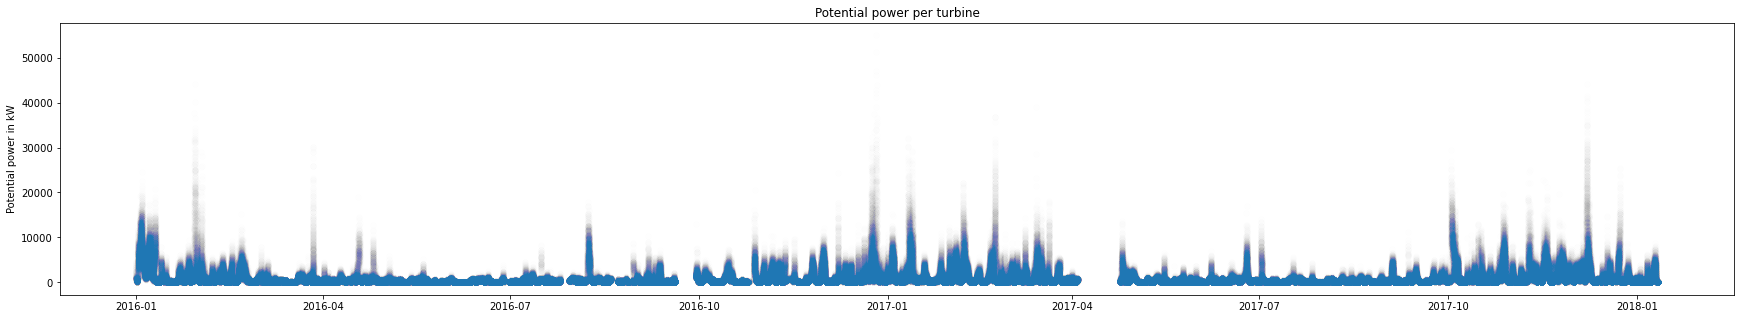

In [31]:
# Potential power
tmp = df_curtail[df_curtail['Timestamp'].dt.year != 2015]
plt.figure(figsize=(30,5))
plt.scatter(tmp['Timestamp'], tmp['Potential_power_kw'], alpha = 0.005)
plt.ylabel('Potential power in kW')
plt.title('Potential power per turbine')

plt.savefig('./Img/Potential power per turbine.jpg')
plt.show()

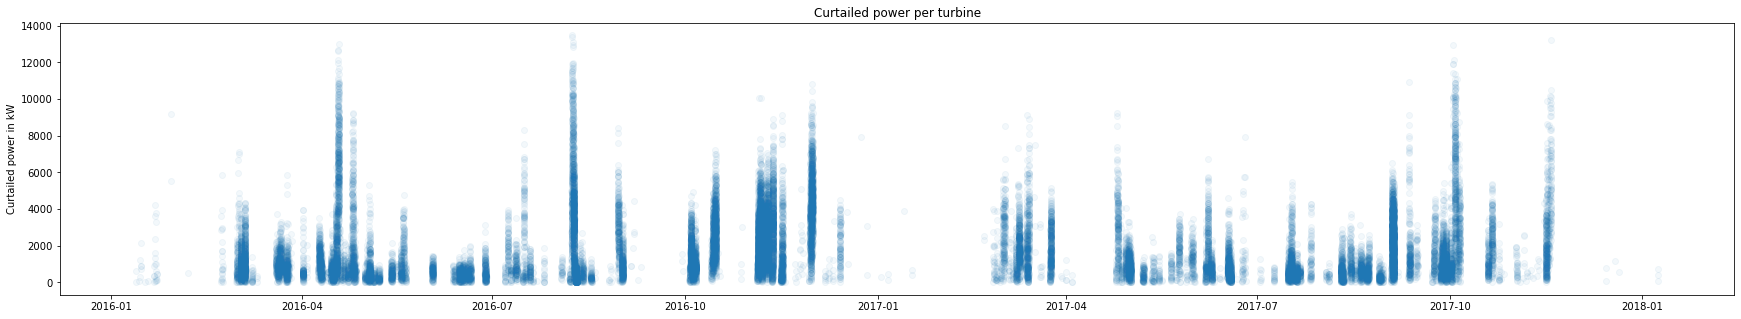

In [32]:
# Curtailed power excluding zeros
tmp = df_curtail[df_curtail['Timestamp'].dt.year != 2015][df_curtail['Curtailed_power_kw'] != 0]
plt.figure(figsize=(30,5))
plt.scatter(tmp['Timestamp'], tmp['Curtailed_power_kw'], alpha = 0.05)
plt.ylabel('Curtailed power in kW')
plt.title('Curtailed power per turbine')

plt.savefig('./Img/Curtailed power per turbine.jpg')
plt.show()

### 7.4.2 Curtailed energy plots

In [33]:
# get wind average per hour
tmp = df_supply[:]
tmp['Time_month'] = df_supply.Timestamp.dt.month
tmp['Time_hour'] = df_supply.Timestamp.dt.hour
wind_avg = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Wind_ms', aggfunc=np.mean)
wind_avg.head(3)

Wind_ms
Time_month Time_hour         
1          0           12.357
           1           12.588
           2           12.951

In [34]:
tmp = df_curtail[:]
tmp['Time_yyyymm'] = tmp.Timestamp.dt.strftime('%Y-%m')
tmp['Time_year'] = tmp.Timestamp.dt.year
tmp['Time_month'] = tmp.Timestamp.dt.month
tmp['Time_day'] = tmp.Timestamp.dt.day
tmp['Time_hour'] = tmp.Timestamp.dt.hour

# Hourly sum of curtailed energy
Sum_YearMonthHour_curtailed_energy_kWh = pd.pivot_table(tmp, index=['Time_year','Time_month','Time_hour'], values='Curtailed_energy_in_1_minute_kwh', aggfunc='sum').reset_index().rename(columns={'Curtailed_energy_in_1_minute_kwh': 'Curtailed_energy_kwh'})
# Daily sum of curtailed energy
Sum_YearMonthDay_curtailed_energy_kWh = pd.pivot_table(tmp, index=[tmp.Timestamp.dt.date,'Time_hour'], values='Curtailed_energy_in_1_minute_kwh', aggfunc='sum').rename(columns={'Curtailed_energy_in_1_minute_kwh': 'Curtailed_energy_kwh'})
# Monthly sum of curtailed energy
Sum_YearMonth_curtailed_energy_kWh = pd.pivot_table(tmp, index=['Time_year','Time_month'], values='Curtailed_energy_in_1_minute_kwh', aggfunc='sum').rename(columns={'Curtailed_energy_in_1_minute_kwh': 'Curtailed_energy_kwh'})

# Average curtailed energy per hour
Avg_MonthHour_curtailed_energy_kWh = pd.pivot_table(Sum_YearMonthHour_curtailed_energy_kWh, index=['Time_month','Time_hour'], values='Curtailed_energy_kwh', aggfunc='mean').join(wind_avg)
# Average curtailed energy per months
tmp = Sum_YearMonth_curtailed_energy_kWh.reset_index()
Avg_Month_curtailed_energy_kWh = pd.pivot_table(tmp, index=['Time_month'], values='Curtailed_energy_kwh', aggfunc='mean')


In [35]:
Sum_YearMonthHour_curtailed_energy_kWh.head(3)

Time_year  Time_month  Time_hour  Curtailed_energy_kwh
0       2015           5          0                 0.000
1       2015           5          1                 0.000
2       2015           5          2                 0.000

In [36]:
Sum_YearMonthDay_curtailed_energy_kWh.head(3)

Curtailed_energy_kwh
Timestamp  Time_hour                      
2015-05-28 0                         0.000
           1                         0.000
           2                         0.000

In [37]:
Sum_YearMonth_curtailed_energy_kWh.head(3)

Curtailed_energy_kwh
Time_year Time_month                      
2015      5                          0.000
          6                         21.704
          9                      17286.712

In [38]:
Avg_MonthHour_curtailed_energy_kWh.head(3)

Curtailed_energy_kwh  Wind_ms
Time_month Time_hour                               
1          0                         0.000   12.357
           1                         5.329   12.588
           2                        32.190   12.951

In [39]:
Avg_Month_curtailed_energy_kWh.head(3)

Curtailed_energy_kwh
Time_month                      
1                        305.580
2                        882.641
3                      43511.315

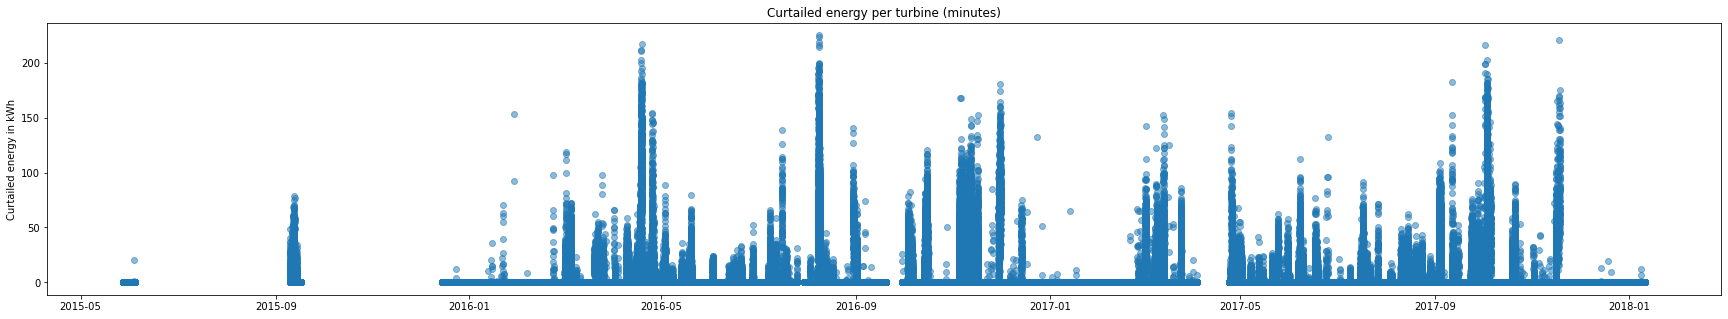

In [73]:
# Curtailed energy scatter plot excluding zeros
plt.figure(figsize=(30,5))
tmp = df_curtail[:]
plt.scatter(tmp['Timestamp'], tmp['Curtailed_energy_in_1_minute_kwh'], alpha = 0.5)
plt.ylabel('Curtailed energy in kWh')
plt.title('Curtailed energy per turbine (minutes)')

plt.savefig('./Img/Curtailed energy per turbine(minutes).jpg')
plt.show()

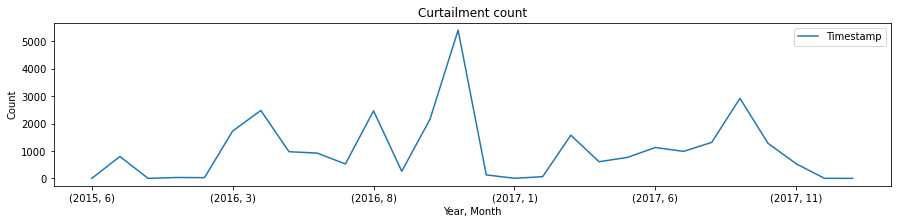

In [112]:
tmp = df_curtail[df_curtail.Curtailed_energy_in_1_minute_kwh != 0]

tmp = tmp.groupby([tmp.Timestamp.dt.year, tmp.Timestamp.dt.month]).count()[['Timestamp']]
tmp.plot(figsize=(15,3))
plt.title('Curtailment count')
plt.xlabel('Year, Month')
plt.ylabel('Count')
plt.show()

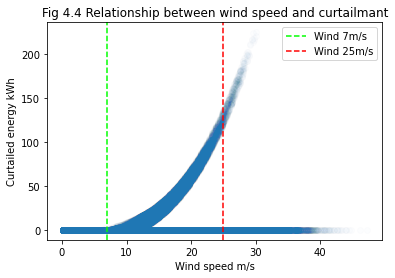

In [41]:
plt.scatter(df_curtail.Wind_ms, df_curtail.Curtailed_energy_in_1_minute_kwh, alpha=0.01)
plt.axvline(7, color='lime', linestyle='--', label='Wind 7m/s')
plt.axvline(25, color='red', linestyle='--', label='Wind 25m/s')
plt.title('Fig 4.4 Relationship between wind speed and curtailmant')
plt.xlabel('Wind speed m/s')
plt.ylabel('Curtailed energy kWh')
plt.legend()

plt.savefig('./img/Fig 4.4 Relationship between wind speed and curtailmant.jpg')
plt.show()

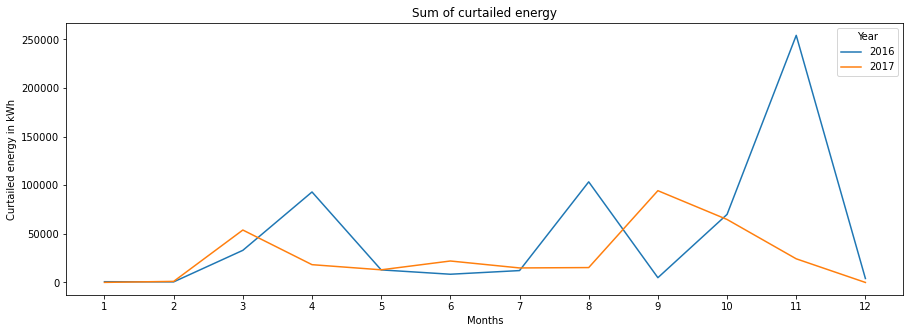

In [42]:
plt.figure(figsize=(15,5))
for i in [2016,2017]:
    plt.plot(Sum_YearMonth_curtailed_energy_kWh.loc[(i)], label=i)
plt.ylabel('Curtailed energy in kWh')
plt.xlabel('Months')
plt.xticks(range(1,13,1))
plt.title('Sum of curtailed energy')
plt.legend(title='Year')

plt.savefig('./Img/Sum of curtailed energy per turbine.jpg')
plt.show()

<AxesSubplot:xlabel='Timestamp,Timestamp'>

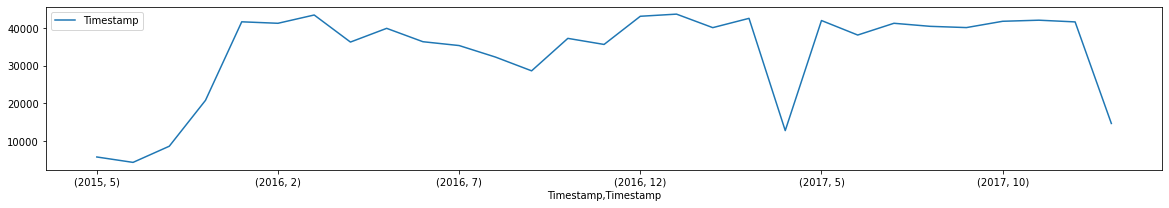

In [43]:
# counting missing data
df_curtail.groupby([df_curtail.Timestamp.dt.year,df_curtail.Timestamp.dt.month]).count().iloc[:,:1].plot(figsize=(20,3))

Sum of curtailed energy graph above illustrated that curtailed energy in 2017 is in general lower than 2016, this could possibly due to increasing households thus using more energy.

Opposite trends in Apr, Sep could due to much less data in Sep 2016 and Apr 2017. The number of data in 2016 in general is less than 2017. 

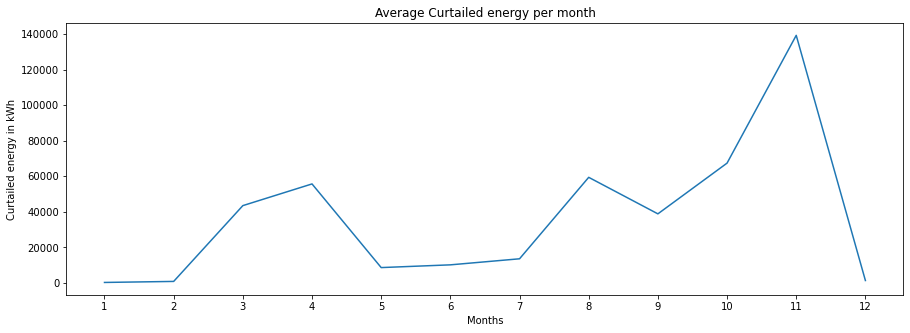

In [44]:
plt.figure(figsize=(15,5))
plt.plot(Avg_Month_curtailed_energy_kWh)
plt.ylabel('Curtailed energy in kWh')
plt.xlabel('Months')
plt.xticks(range(1,13,1))
plt.title('Average Curtailed energy per month')

plt.savefig('./Img/Average Curtailed energy per month per turbine.jpg')
plt.show()

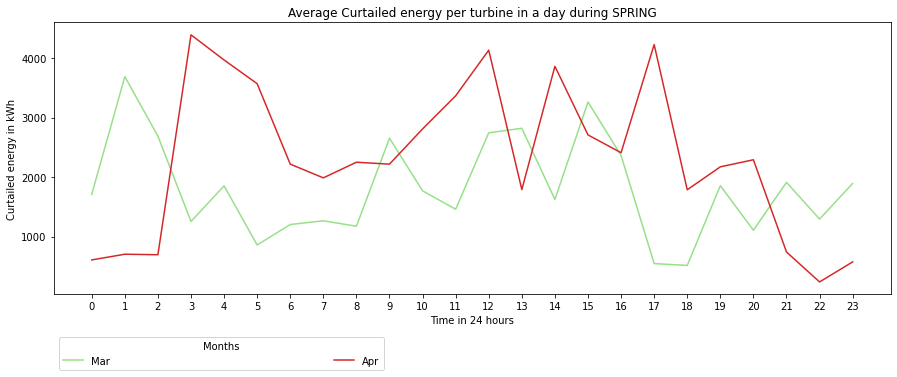

In [45]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(3,5):   
    plt.plot(Avg_MonthHour_curtailed_energy_kWh.loc[(i),'Curtailed_energy_kwh'], label=month[i-1], color=colors[i])

plt.ylabel('Curtailed energy in kWh')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Average Curtailed energy per turbine in a day during SPRING')
plt.legend(title='Months',bbox_to_anchor=(0., -0.24, 0.4, .102),ncol=6, mode="expand",loc='upper center')

plt.savefig('./Img/Average Curtailed energy per turbine in a day during SPRING per turbine.jpg')
plt.show()

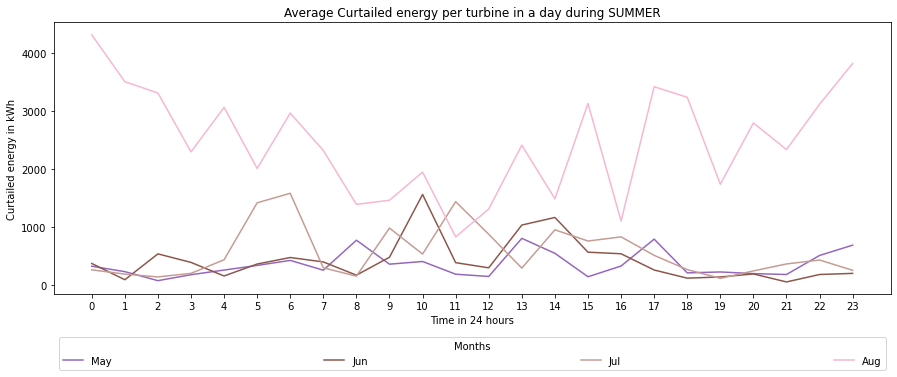

In [46]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(5,9):
    plt.plot(Avg_MonthHour_curtailed_energy_kWh.loc[(i),'Curtailed_energy_kwh'], label=month[i-1], color=colors[i])
plt.ylabel('Curtailed energy in kWh')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Average Curtailed energy per turbine in a day during SUMMER')
plt.legend(title='Months',bbox_to_anchor=(0., -0.24, 1, .102),ncol=6, mode="expand",loc='upper center')

plt.savefig('./Img/Average Curtailed energy per turbine in a day during SUMMER per turbine.jpg')
plt.show()

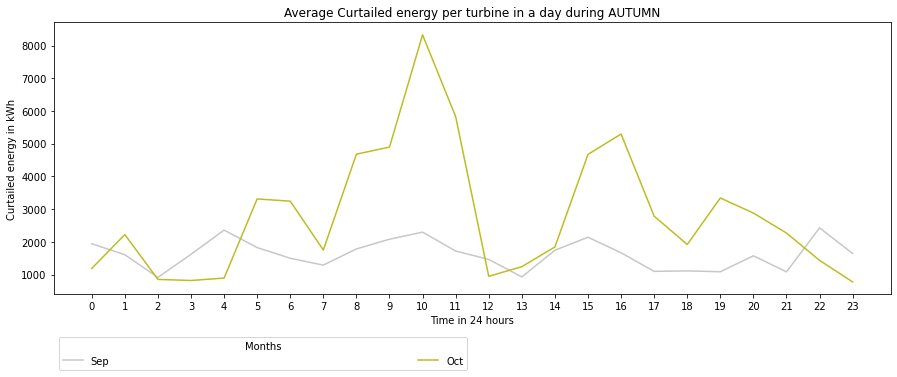

In [47]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(9,11):
    plt.plot(Avg_MonthHour_curtailed_energy_kWh.loc[(i),'Curtailed_energy_kwh'], label=month[i-1], color=colors[i])
plt.ylabel('Curtailed energy in kWh')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Average Curtailed energy per turbine in a day during AUTUMN')
plt.legend(title='Months',bbox_to_anchor=(0., -0.24, 0.5, .102),ncol=6, mode="expand",loc='upper center')

plt.savefig('./Img/Average Curtailed energy per turbine in a day during AUTUMN per turbine.jpg')
plt.show()

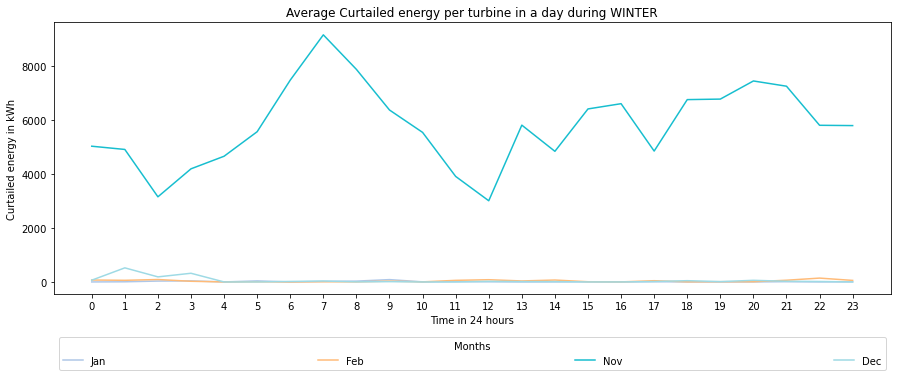

In [48]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in [1,2,11,12]:
    plt.plot(Avg_MonthHour_curtailed_energy_kWh.loc[(i),'Curtailed_energy_kwh'], label=month[i-1], color=colors[i])
plt.ylabel('Curtailed energy in kWh')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Average Curtailed energy per turbine in a day during WINTER')
plt.legend(title='Months',bbox_to_anchor=(0., -0.24, 1, .102),ncol=6, mode="expand",loc='upper center')

plt.savefig('./Img/Average Curtailed energy per turbine in a day during WINTER per turbine.jpg')
plt.show()

## 7.5 User behaviors

### 7.5.1  Average Wind speed pattern (Fig 4.5):
1. Winter (Nov - Feb): highest
2. Summer (May - Aug): lowest
3. Spring and Autumn: moderate
4. Not much differences in terms of hours

### 7.5.2 Average Demand pattern (Fig 4.6):
1. 0am-5am: low, sleeping
2. 5am-7am: start rising coz time to wakeup
3. 7am-3pm: constant coz people in office/ school, maybe just one person at home watching TV or doing houseworks.
4. 3pm-5pm: rise, peak at 6pm. People off work/ school, back to home and start using electricity like TV, computer, lights....
5. Winter time colder and dark earlier thus higher demand during 5pm-11pm
6. 6pm-11pm dropping: Night life outside, time to sleep

### 7.5.3 Average Curatiled energy (Fig 4.7):
1. Don't have obvious pattern because setpoint has no siginificant relationship with any variables as shown later in 7.5.6 

<Figure size 1080x648 with 0 Axes>

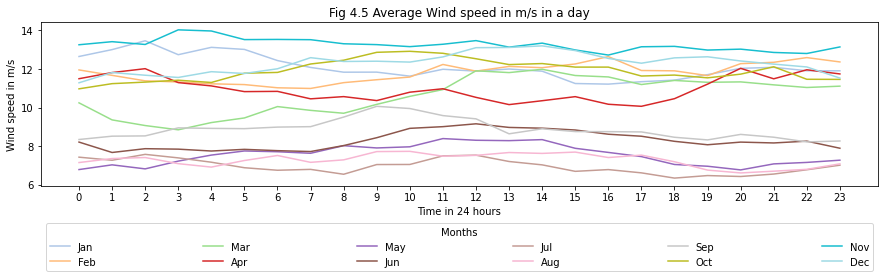

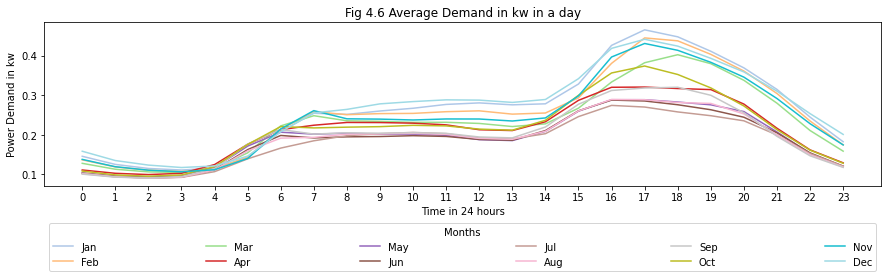

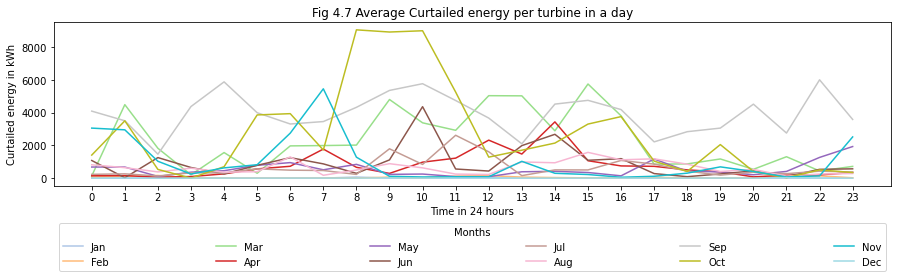

In [49]:
plt.figure(figsize=(15,9))

##### ---- Average Wind speed in m/s in a day (2017)
tmp = df_supply[df_supply.Timestamp.dt.year == 2017] # only 2017 for consistency with demand data
tmp['Time_month'] = df_supply.Timestamp.dt.month
tmp['Time_hour'] = df_supply.Timestamp.dt.hour
wind_avg = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Wind_ms', aggfunc=np.mean)

# plot
plt.figure(figsize=(15,3))
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for Month in range(1,13): 
    plt.plot(wind_avg.loc[(Month),'Wind_ms'], label=month[Month-1], color=colors[Month])
plt.xticks(range(0,24,1))
plt.ylabel('Wind speed in m/s')
plt.xlabel('Time in 24 hours')
plt.legend(title='Months',bbox_to_anchor=(0., -0.3, 1, .102),ncol=6, mode="expand",loc='upper center')
plt.title('Fig 4.5 Average Wind speed in m/s in a day')
plt.savefig('./Img/Fig 4.5 Average Wind speed in ms in a day.jpg')
plt.show()

##### ---- Average Demand in kw in a day (2017)
# Averge demands per households

tmp=df_demand[:]
tmp['Time_month'] = tmp['Timestamp'].dt.month
tmp['Time_hour'] = tmp['Timestamp'].dt.hour

monthly_avg_demand = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Demand_mean_kw', aggfunc=np.mean)

# plot
plt.figure(figsize=(15,3))
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for Month in range(1,13): 
    plt.plot(monthly_avg_demand.loc[(Month),'Demand_mean_kw'], label=month[Month-1], color=colors[Month])
plt.xticks(range(0,24,1))
plt.ylabel('Power Demand in kw')
plt.xlabel('Time in 24 hours')
plt.legend(title='Months',bbox_to_anchor=(0., -0.3, 1, .102),ncol=6, mode="expand",loc='upper center')
plt.title('Fig 4.6 Average Demand in kw in a day')
plt.savefig('./Img/Fig 4.6 Average Demand in kw in a day.jpg')
plt.show()


##### ---- Average Curtailed energy per turbine in a day (2017)
tmp = Sum_YearMonthHour_curtailed_energy_kWh[Sum_YearMonthHour_curtailed_energy_kWh.Time_year == 2017].iloc[:,1:]
plt.figure(figsize=(15,3))
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
for Month in range(1,13): 
    plt.plot(tmp[tmp.Time_month == Month]['Time_hour'],
             tmp[tmp.Time_month == Month]['Curtailed_energy_kwh'],
             label=months[Month-1], color=colors[Month])

plt.ylabel('Curtailed energy in kWh')  
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.legend(title='Months',bbox_to_anchor=(0., -0.3, 1, .102),ncol=6, mode="expand",loc='upper center')
plt.title('Fig 4.7 Average Curtailed energy per turbine in a day')  
plt.savefig('./Img/Fig 4.7 Average Curtailed energy per turbine in a day.jpg')
plt.show()


### 7.5.4 Interaction graph

In [50]:
from ipywidgets import interact, interact_manual

@interact(Month=[1,2,3,4,5,6,7,8,9,10,11,12])
##### ---- Average Curtailed energy per turbine in a day (2017)
def graph(Month):
    
    plt.figure(figsize=(15,12))
    
    
    ax1 = plt.subplot(311)
    ax2 = plt.subplot(312)
    ax3 = plt.subplot(313)
    
    ##### ---- Average Wind speed in m/s in a day (2017)
    tmp = df_supply[df_supply.Timestamp.dt.year == 2017] # Include only 2017 for consistency
    tmp['Time_month'] = df_supply.Timestamp.dt.month
    tmp['Time_hour'] = df_supply.Timestamp.dt.hour
    wind_avg = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Wind_ms', aggfunc=np.mean)

    # plot
    n=13
    colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
    month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    
    ax1.plot(wind_avg.loc[(Month),'Wind_ms'], label=month[Month-1], color=colors[Month])
    ax1.set_xticks(range(0,24,1))
    ax1.set_ylabel('Wind speed in m/s')
    ax1.set_title('Average Wind speed in m/s in a day')
    
    ##### ---- Average Demand in kw in a day (2017)
    # Averge demands per households

    tmp=df_demand[:]
    tmp['Time_month'] = tmp['Timestamp'].dt.month
    tmp['Time_hour'] = tmp['Timestamp'].dt.hour

    monthly_avg_demand = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Demand_mean_kw', aggfunc=np.mean)

    # plot
    n=13
    colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
    month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    ax2.plot(monthly_avg_demand.loc[(Month),'Demand_mean_kw'], label=month[Month-1], color=colors[Month])
    ax2.set_xticks(range(0,24,1))
    ax2.set_ylabel('Power Demand in kw')
    ax2.set_title('Average Demand in kw in a day')
    
    ##### ---- Average Curtailed energy per turbine in a day (2017)
    tmp = Sum_YearMonthHour_curtailed_energy_kWh[Sum_YearMonthHour_curtailed_energy_kWh.Time_year == 2017].iloc[:,1:]
    n=13
    colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
    months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
    ax3.plot(tmp[tmp.Time_month == Month]['Time_hour'],
             tmp[tmp.Time_month == Month]['Curtailed_energy_kwh'],
             label=months[Month-1], color=colors[Month])

    ax3.set_ylabel('Curtailed energy in kWh')
    ax3.set_xticks(range(0,24,1))
    ax3.set_title('Average Curtailed energy per turbine in a day') 
    ax3.set_xlabel('Time in 24 hours')
    
    plt.tight_layout(pad=2.0)
    plt.show()

interactive(children=(Dropdown(description='Month', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), value=1),…

### 7.5.5 Sum of demands
Demand_mean_kw provided is the mean demand of the sample of households during the measurement period where the timestamp is situated at the end of the measurement period. Assuming that every minutes within that period have the same demand in kW, we can calculate sum of demand in terms of energy (kWh) by:
1. Aggregated demand power in 1 minute = Demand_mean_kw x 60 sec x 0.278 x 10^-3
2. Thus, aggregated demand power in 30 minutes = (Demand_mean_kw x 60 sec x 0.278 x 10^-3) x 30

We also assumed total number of households was 22000 in 2017, referencing figure from the government. https://www.nrscotland.gov.uk/files/statistics/council-area-data-sheets/orkney-islands-council-profile.html#table_pop_est

In [51]:
tmp=df_demand[:]
n=22000
tmp['Sum_demand_30min_kWh_1_household'] = (tmp['Demand_mean_kw']* 60 * 0.278 /1000) * 30
tmp['Total_demand_30min_kWh_N_households'] = tmp['Sum_demand_30min_kWh_1_household']* n

tmp['Time_month'] = tmp['Timestamp'].dt.month
tmp['Time_day'] = tmp['Timestamp'].dt.day
tmp['Time_hour'] = tmp['Timestamp'].dt.hour

DateHour_sum_demand_1house = pd.pivot_table(tmp, index=[tmp['Timestamp'].dt.date, 'Time_hour'], values='Sum_demand_30min_kWh_1_household', aggfunc='sum').rename(columns={'Sum_demand_30min_kWh_1_household': 'Demand_1house_kWh'})
MonthHour_sum_demand_1house = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Sum_demand_30min_kWh_1_household', aggfunc='sum').rename(columns={'Sum_demand_30min_kWh_1_household': 'Demand_1house_kWh'})

DateHour_sum_demand_Nhouses = pd.pivot_table(tmp, index=[tmp['Timestamp'].dt.date, 'Time_hour'], values='Total_demand_30min_kWh_N_households', aggfunc='sum').rename(columns={'Total_demand_30min_kWh_N_households': 'Demand_Nhouse_kWh'})
MonthHour_sum_demand_Nhouses = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Total_demand_30min_kWh_N_households', aggfunc='sum').rename(columns={'Total_demand_30min_kWh_N_households': 'Demand_Nhouse_kWh'})

DateHour_sum_demand = DateHour_sum_demand_1house.join(DateHour_sum_demand_Nhouses)
MonthHour_sum_demand = MonthHour_sum_demand_1house.join(MonthHour_sum_demand_Nhouses)

monthly_sum_demand = MonthHour_sum_demand_1house.reset_index().groupby('Time_month').sum().iloc[:,1:]
monthly_sum_demand['Demand_Nhouse_kWh'] = monthly_sum_demand['Demand_1house_kWh'] * n
monthly_sum_demand

Demand_1house_kWh  Demand_Nhouse_kWh
Time_month                                      
1                     201.576        4434681.672
2                     168.741        3712291.034
3                     172.284        3790244.931
4                     152.217        3348783.553
5                     142.931        3144473.886
6                     135.418        2979192.612
7                     135.696        2985312.219
8                     141.149        3105271.491
9                     142.663        3138580.243
10                    160.013        3520278.881
11                    175.291        3856412.162
12                    197.941        4354710.152

In [52]:
a=tmp.groupby([tmp.Timestamp.dt.year]).sum().rename(columns={'Sum_demand_30min_kWh_1_household': 'Annual kWh'}).loc[2017][['Annual kWh']]
m=tmp.groupby([tmp.Timestamp.dt.month]).sum().rename(columns={'Sum_demand_30min_kWh_1_household': 'Monthly kWh'}).mean()[['Monthly kWh']]
d=tmp.groupby([tmp.Timestamp.dt.date]).sum().rename(columns={'Sum_demand_30min_kWh_1_household': 'Daily kWh'}).mean()[['Daily kWh']]
avg_energy_consumption = pd.DataFrame()
avg_energy_consumption.loc['Electricity','Annual kWh'] = a.values
avg_energy_consumption.loc['Electricity','Monthly kWh'] = m.values
avg_energy_consumption.loc['Electricity','Daily kWh'] = d.values
avg_energy_consumption

Annual kWh  Monthly kWh  Daily kWh
Electricity    1919.577      160.493      5.262

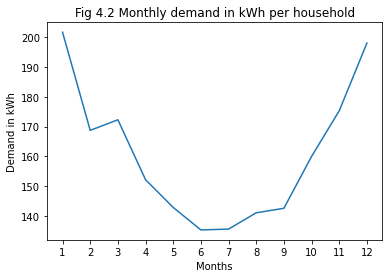

In [53]:
monthly_sum_demand['Demand_1house_kWh'].plot()
plt.xticks(np.arange(1,13))
plt.title('Fig 4.2 Monthly demand in kWh per household')
plt.xlabel('Months')
plt.ylabel('Demand in kWh')

plt.savefig('./img/Fig 4.2 Monthly demands per household scatter.jpg')
plt.show()

<AxesSubplot:xlabel='Time_month,Time_hour'>

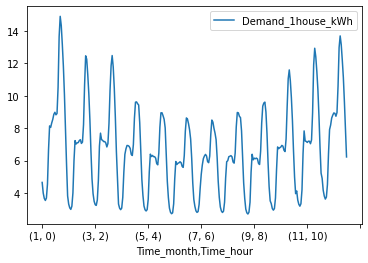

In [54]:
MonthHour_sum_demand_1house.plot()

In [55]:
tmp

Timestamp  Demand_mean_kw  N_households  \
1     2017-01-01 00:29:59           0.206          5429   
2     2017-01-01 00:59:59           0.189          5429   
3     2017-01-01 01:29:59           0.173          5429   
4     2017-01-01 01:59:59           0.159          5429   
5     2017-01-01 02:29:59           0.148          5429   
...                   ...             ...           ...   
17563 2018-01-01 21:29:59           0.306         10730   
17564 2018-01-01 21:59:59           0.283         10731   
17565 2018-01-01 22:29:59           0.256         10731   
17566 2018-01-01 22:59:59           0.246         10731   
17567 2018-01-01 23:29:59           0.219         10731   

       Sum_demand_30min_kWh_1_household  Total_demand_30min_kWh_N_households  \
1                                 0.103                             2267.209   
2                                 0.095                             2081.653   
3                                 0.087                             1905.822   
4                                 0.080                             1750.957   
5                                 0.074                             1625.517   
...                                 ...                                  ...   
17563                             0.153                             3367.647   
17564                             0.142                             3115.220   
17565                             0.128                             2823.737   
17566                             0.123                             2706.280   
17567                             0.109                             2408.649   

       Time_month  Time_day  Time_hour  
1               1         1          0  
2               1         1          0  
3               1         1          1  
4               1         1          1  
5               1         1          2  
...           ...       ...        ...  
17563           1         1         21  
17564           1         1         21  
17565           1         1         22  
17566           1         1         22  
17567           1         1         23  

[17567 rows x 8 columns]

### 7.5.6 Relationship between setpoint and other variables
We would like to see any relationship between setpoint and other variables, under what circumstances they change setpoint lower or higher. However, from results below, we don't see a clear relationships.

In [113]:
avg_curtail = df_curtail[:]
avg_curtail['month'] = avg_curtail['Timestamp'].dt.month
avg_curtail['hour'] = avg_curtail['Timestamp'].dt.hour

tmp1 = avg_curtail[avg_curtail['Timestamp'].dt.year==2017].groupby([avg_curtail.Timestamp.dt.date, 'hour']).mean().reset_index()
tmp2 = avg_curtail[avg_curtail['Timestamp'].dt.year==2017].groupby([avg_curtail.Timestamp.dt.date, 'hour']).sum().reset_index()
tmp1['Curtailed_energy_1hr_kwh'] = tmp2['Curtailed_energy_in_1_minute_kwh']
tmp1=tmp1.merge(DateHour_sum_demand_1house.reset_index(), how='left', left_on=["Timestamp","hour"], right_on=["Timestamp", "Time_hour"]).dropna()
tmp1['Wind_sq'] = tmp1['Wind_ms'] **2

tmp1['Low_usage'] = 0
tmp1['Medium_usage'] = 0
tmp1['High_usage'] = 0
tmp1['Spring'] = 0
tmp1['Summer'] = 0
tmp1['Autumn'] = 0
tmp1['Winter'] = 0


tmp1['Low_usage'][tmp1['hour'].isin([23,0,1,2,3,4,5])] = 1 #Low usage
tmp1['Medium_usage'][tmp1['hour'].isin(list(range(6,17)))] = 1 #Medium usage
tmp1['High_usage'][tmp1['hour'].isin(list(range(17,23)))] = 1
tmp1['Spring'][tmp1['month'].isin([3,4])] = 1
tmp1['Summer'][tmp1['month'].isin([5,6,7,8])] = 1
tmp1['Autumn'][tmp1['month'].isin([9,10])] = 1
tmp1['Winter'][tmp1['month'].isin([11,12,1,2])] = 1

x = tmp1[['Demand_1house_kWh','Potential_power_kw']]
y = tmp1['Setpoint_kw']


No significant correlation between Setpoint and Demand. Wind or potential power.

Text(0.5, 1.0, 'Correlation Heatmap')

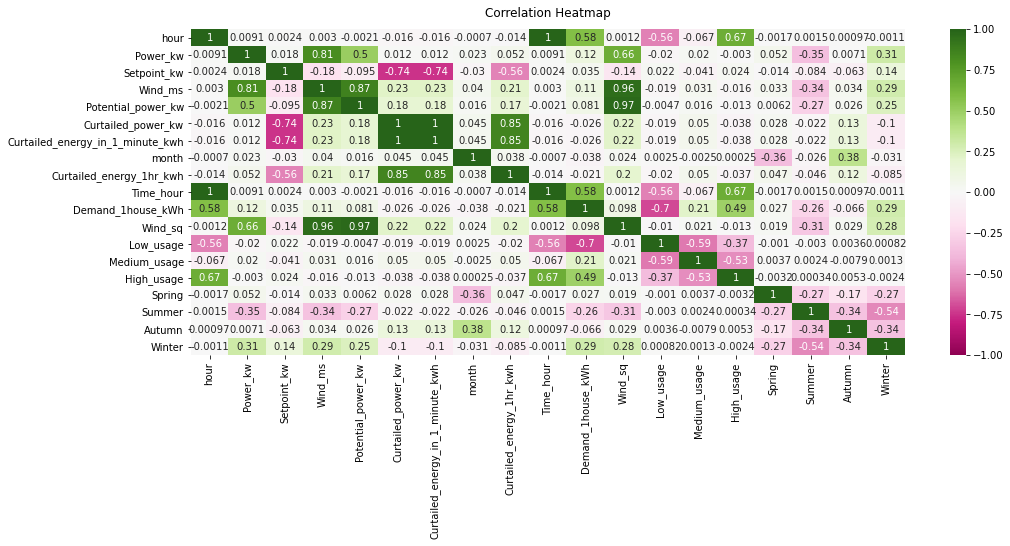

In [57]:
plt.figure(figsize=(16,6))

heatmap = sns.heatmap(tmp1.corr(), vmin=-1, vmax=1, annot=True, cmap="PiYG")

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

<AxesSubplot:xlabel='Setpoint_kw'>

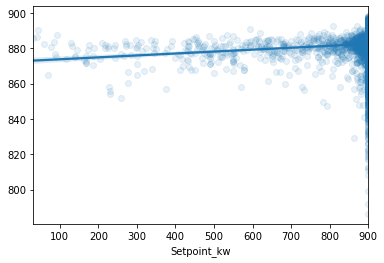

In [114]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
predictions = model.predict(x)
sns.regplot(y,predictions,scatter_kws={'alpha':0.1})

In [115]:
import statsmodels.api as sm

X = sm.add_constant(x)
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            Setpoint_kw   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     44.29
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           7.41e-20
Time:                        14:12:46   Log-Likelihood:                -46822.
No. Observations:                8030   AIC:                         9.365e+04
Df Residuals:                    8027   BIC:                         9.367e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                878.5589      2

R-sqaured is very low thus we can't predict setpoint using the OLS.

## 7.6 Problems of curtailment

### 7.6.1 How much energy is currently curtailed annually across the Orkney Isles? And the revenue loss?

Electricity cost in Orkney https://www.switch-plan.co.uk/suppliers/scottish-power/orkney/:

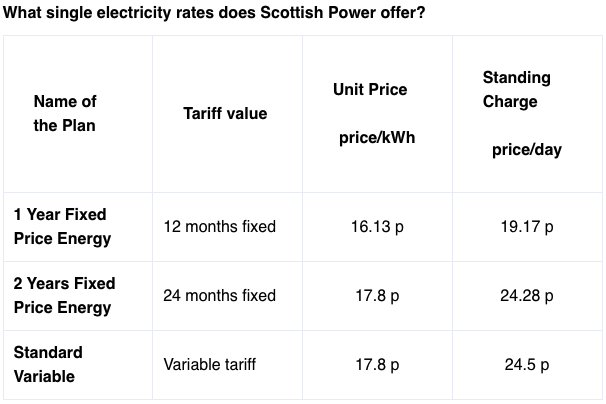

Assume the Orkney wind turbine provider charges customers the lowest rate of Scottish Power: 16.13p /kWh and 19.17p /day, revenue loss per minute due to curtailment equals to (Curtailed energy in kWh/minute * 16.13 + 19.17/1440) * 0.01

In [60]:
# number of minute in a day = 24*60 = 1440
# 19.17p/day standing charge converted to minute = (19.17 / 1440)p/minute
24*60

1440

In [61]:
# yearly revenue loss in GBP
df_curtail['Revenue_loss_GBP'] = (df_curtail.Curtailed_energy_in_1_minute_kwh* 16.13 + 19.17/1440)*0.01
tmp = df_curtail[df_curtail.Timestamp.dt.year.isin([2016,2017])].groupby(df_curtail['Timestamp'].dt.year).sum()[['Curtailed_energy_in_1_minute_kwh','Revenue_loss_GBP']].rename(columns={'Curtailed_energy_in_1_minute_kwh':'Annual Curtailment in kWh per turbine', 'Revenue_loss_GBP': 'Revenue loss in GBP per turbine'})
tmp['Annual Curtailment in kWh for 500 turbines'] = tmp['Annual Curtailment in kWh per turbine'] * 500
tmp['Revenue loss in GBP for 500 turbines'] = tmp['Revenue loss in GBP per turbine'] * 500
tmp

Annual Curtailment in kWh per turbine  \
Timestamp                                          
2016                                  597987.892   
2017                                  322583.151   

           Revenue loss in GBP per turbine  \
Timestamp                                    
2016                             96515.602   
2017                             52094.866   

           Annual Curtailment in kWh for 500 turbines  \
Timestamp                                               
2016                                    298993946.061   
2017                                    161291575.361   

           Revenue loss in GBP for 500 turbines  
Timestamp                                        
2016                               48257800.897  
2017                               26047433.033

In [62]:
avg_16_17 = tmp.describe().loc[['mean']]
avg_16_17.index = ['Mean_2016&2017']
avg_16_17

Annual Curtailment in kWh per turbine  \
Mean_2016&2017                             460285.521   

                Revenue loss in GBP per turbine  \
Mean_2016&2017                        74305.234   

                Annual Curtailment in kWh for 500 turbines  \
Mean_2016&2017                               230142760.711   

                Revenue loss in GBP for 500 turbines  
Mean_2016&2017                          37152616.965

### 7.6.2 How much can this be reduced by different levels of DR penetration? How many local households would need to be on our DR scheme in order to supply this level of DR?
We have 22000 total households on the island as of 2017, so the maximum households we can penetrate DR to is 22000. In the trial period, we may want to start with fewer households i.e. 30 first to see if the DR devices cost could be covered in a few years.

Below table shows the average energy consumption and cost at Scotland (sources: https://great-home.co.uk/average-electricity-gas-bills-in-2019/) :
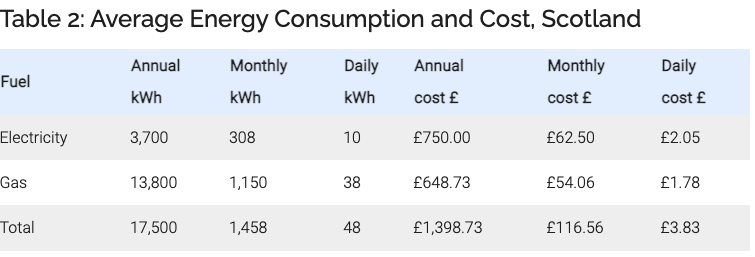

The average electricity monthly demand in Scotland is 308kWh, while Orkney was half of that (148kWh). The total energy consumption per household should not vary that much, therefore Orkney residents might be using far more gas than Scotland average. After installing DR devices, we could expect increase in demand to meet the average, and possibly also shift some gas usage to electricity, with the total overall energy usage unchanged.

In [63]:
print('Daily average electricity demand of one household (Orkney Island) is ',( monthly_sum_demand.sum()/365 )['Demand_1house_kWh'],'kWh')
print('Daily average electricity demand of one household (Scotland) is ',3700/365,'kWh')

Daily average electricity demand of one household (Orkney Island) is  5.276492258372609 kWh
Daily average electricity demand of one household (Scotland) is  10.136986301369863 kWh


We have several choices of power storage installation:
1. Battery storage for electricity energy:
    - According to https://www.cse.org.uk/advice/renewable-energy/battery-storage, 'On average installing a battery will cost £4,000-£8,000, with a useable capacity of 3.8-13.5 kWh'. Assume that to support daily usage of 5kWh or 10kWh, we need a £5,000 or £6,500 battery storage respectively.
    
2. Storage heater to replace gas:
    - The storage capacity of a storage heater https://www.dimplex.co.uk/product/quantum-hhr-storage-heater is 15.54kWh, costs £858.10. The energy needed exceeds daily average of demand per household 4.869kWh, so probably residents are using gas for hot water, thus installing this could shift their energy usage from gas to wind power. 

3. Hot water tank to replace gas:
    - According to https://www.ccwater.org.uk/households/using-water-wisely/averagewateruse/, a shower uses 8 litres per minute on average. Assuming that all households have 3 residents, each of them take 10 minutes for a shower, they need 390 litres of hot water for shower per day. With references to https://www.sust-it.net/immersion-heater-energy-calculator.php, 240 litres of hot water needs 12.5kWh energy per day. If we install a 210Ltrs 6kW immersion water heater, for example, https://www.shop4-waterheaters.co.uk/product.php/393405286/heatrae_sadia_95_050_468_megaflo_eco_210dd_white_stainless_steel_direct_unvented_cylinder_style_water_heater_with_2_x_3kw_immersion_elements_210ltrs_6kw?search_query=Megaflo+210+ltrs&results=75, it costs £ 1,117.42. The energy needed for shower is 12.5kWh, which exceeds the daily average of demand per household 4.869kWh, so probably residents are using gas for hot water, thus installing this could shift their energy usage from gas to wind power. 

##### How much gas could be shift to wind energy through installing storage heater and hot water tank?
1. Assume storage heater annual usage 15.54kWh * 30 * 4 = 1864.8kWh (4 months winter usage)
2. Assume annual hot water usage 12.5kWh * 365 = 4562.5kWh
3. The ballpark allowable gas shift is (1864.8 + 4562.5)/13800 = 46.6%

Therefore, curtailment could be reduced further and calculated in following cases:
1. Number of households * Orkney annual demands
2. Number of households * Scotland annual electricity demands
3. Number of households * Scotland annual electricity + 46% gas demands
4. Number of households * Scotland annual 46% gas demands

After DR rollout and if proved demand could increase, we could start charging customers. If the cost could be compensated within 6 years of trial (5 years after charging), we'll go for the plan. 6 years as the cut off point because we don't want to risk for the cost of appliances maintenance. Assume that gas and electricity cost the same.

#### 7.6.2.1 Households * Orkney annual demand
Not recommended. Not profitable in 6 years.

In [64]:
DR=pd.DataFrame()

n = [22000, 22000*0.75, 22000*0.5, 22000*0.25, 100, 50, 30]
for i in range(len(n)):
    n_house = n[i]
    DR.loc[i,'N_households'] = n_house
    DR.loc[i,'Consumed_energy_kwh'] = n_house * monthly_sum_demand.sum()['Demand_1house_kWh']
    DR.loc[i,'%of_curtailed_energy_kwh'] = float(DR.loc[i,'Consumed_energy_kwh'] / avg_16_17['Annual Curtailment in kWh for 500 turbines'].values) * 100
    DR.loc[i,'Revenue in GBP'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01
    DR.loc[i,'Revenue in GBP (25% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.75
    DR.loc[i,'Revenue in GBP (50% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.5
    DR.loc[i,'Revenue in GBP (75% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.25
    
    DR.loc[i,'Cost of battery storage'] = 5000 
    DR.loc[i,'Battery storage capacity kWh'] = 5
    
    # First year is not profitable because under DR trial. 
    DR.loc[i,'Profit in GBP (2nd year)'] = DR.loc[i,'Revenue in GBP'] - 5000 * n_house
    DR.loc[i,'Profit in GBP (2nd year) (25% discount)'] = DR.loc[i,'Revenue in GBP (25% discount)'] - 5000 * n_house
    DR.loc[i,'Profit in GBP (2nd year) (50% discount)'] = DR.loc[i,'Revenue in GBP (50% discount)'] - 5000 * n_house
    DR.loc[i,'Profit in GBP (2nd year) (75% discount)'] = DR.loc[i,'Revenue in GBP (75% discount)'] - 5000 * n_house
    
    DR.loc[i,'Profit in GBP (6 years)'] = 5*DR.loc[i,'Revenue in GBP'] - 5000 * n_house
    DR.loc[i,'Profit in GBP (6 years) (25% discount)'] = 5*DR.loc[i,'Revenue in GBP (25% discount)'] - 5000 * n_house
    DR.loc[i,'Profit in GBP (6 years) (50% discount)'] = 5*DR.loc[i,'Revenue in GBP (50% discount)'] - 5000 * n_house
    DR.loc[i,'Profit in GBP (6 years) (75% discount)'] = 5*DR.loc[i,'Revenue in GBP (75% discount)'] - 5000 * n_house

DR

N_households  Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000         42370232.835                    18.410   
1     16500.000         31777674.626                    13.808   
2     11000.000         21185116.417                     9.205   
3      5500.000         10592558.209                     4.603   
4       100.000           192591.967                     0.084   
5        50.000            96295.984                     0.042   
6        30.000            57777.590                     0.025   

   Revenue in GBP  Revenue in GBP (25% discount)  \
0     6834388.527                    5125791.395   
1     5125808.888                    3844356.666   
2     3417229.249                    2562921.936   
3     1708649.610                    1281487.207   
4       31135.055                      23351.291   
5       15602.513                      11701.885   
6        9389.496                       7042.122   

   Revenue in GBP (50% discount)  Revenue in GBP (75% discount)  \
0                    3417194.263                    1708597.132   
1                    2562904.444                    1281452.222   
2                    1708614.624                     854307.312   
3                     854324.805                     427162.402   
4                      15567.527                       7783.764   
5                       7801.256                       3900.628   
6                       4694.748                       2347.374   

   Cost of battery storage  Battery storage capacity kWh  \
0                 5000.000                         5.000   
1                 5000.000                         5.000   
2                 5000.000                         5.000   
3                 5000.000                         5.000   
4                 5000.000                         5.000   
5                 5000.000                         5.000   
6                 5000.000                         5.000   

   Profit in GBP (2nd year)  Profit in GBP (2nd year) (25% discount)  \
0            -103165611.473                           -104874208.605   
1             -77374191.112                            -78655643.334   
2             -51582770.751                            -52437078.064   
3             -25791350.390                            -26218512.793   
4               -468864.945                              -476648.709   
5               -234397.487                              -238298.115   
6               -140610.504                              -142957.878   

   Profit in GBP (2nd year) (50% discount)  \
0                           -106582805.737   
1                            -79937095.556   
2                            -53291385.376   
3                            -26645675.195   
4                              -484432.473   
5                              -242198.744   
6                              -145305.252   

   Profit in GBP (2nd year) (75% discount)  Profit in GBP (6 years)  \
0                           -108291402.868            -75828057.366   
1                            -81218547.778            -56870955.562   
2                            -54145692.688            -37913853.757   
3                            -27072837.598            -18956751.952   
4                              -492216.236              -344324.726   
5                              -246099.372              -171987.437   
6                              -147652.626              -103052.521   

   Profit in GBP (6 years) (25% discount)  \
0                           -84371043.025   
1                           -63278216.671   
2                           -42185390.318   
3                           -21092563.964   
4                             -383243.544   
5                             -191490.577   
6                             -114789.391   

   Profit in GBP (6 years) (50% discount)  \
0                           -92914028.683   
1                           -69685477.781   
2                           

In [65]:
DR[['N_households','Consumed_energy_kwh','%of_curtailed_energy_kwh','Profit in GBP (6 years)','Profit in GBP (6 years) (25% discount)','Profit in GBP (6 years) (50% discount)','Profit in GBP (6 years) (75% discount)']]

N_households  Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000         42370232.835                    18.410   
1     16500.000         31777674.626                    13.808   
2     11000.000         21185116.417                     9.205   
3      5500.000         10592558.209                     4.603   
4       100.000           192591.967                     0.084   
5        50.000            96295.984                     0.042   
6        30.000            57777.590                     0.025   

   Profit in GBP (6 years)  Profit in GBP (6 years) (25% discount)  \
0            -75828057.366                           -84371043.025   
1            -56870955.562                           -63278216.671   
2            -37913853.757                           -42185390.318   
3            -18956751.952                           -21092563.964   
4              -344324.726                             -383243.544   
5              -171987.437                             -191490.577   
6              -103052.521                             -114789.391   

   Profit in GBP (6 years) (50% discount)  \
0                           -92914028.683   
1                           -69685477.781   
2                           -46456926.878   
3                           -23228375.976   
4                             -422162.363   
5                             -210993.718   
6                             -126526.260   

   Profit in GBP (6 years) (75% discount)  
0                          -101457014.342  
1                           -76092738.890  
2                           -50728463.439  
3                           -25364187.988  
4                             -461081.181  
5                             -230496.859  
6                             -138263.130

#### 7.6.2.2 Households * Scotland annual electricity demand
Not recommended. Not profitable in 6 years.

In [66]:
DR=pd.DataFrame()

n = [22000, 22000*0.75, 22000*0.5, 22000*0.25, 100, 50, 30]
for i in range(len(n)):
    n_house = n[i]
    DR.loc[i,'N_households'] = n_house
    DR.loc[i,'Consumed_energy_kwh'] = n_house * 3700
    DR.loc[i,'%of_curtailed_energy_kwh'] = float(DR.loc[i,'Consumed_energy_kwh'] / avg_16_17['Annual Curtailment in kWh for 500 turbines'].values)*100
    DR.loc[i,'Revenue in GBP'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01
    DR.loc[i,'Revenue in GBP (25% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.75
    DR.loc[i,'Revenue in GBP (50% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.5
    DR.loc[i,'Revenue in GBP (75% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.25
    
    DR.loc[i,'Cost of battery storage'] = 6500
    DR.loc[i,'Battery storage capacity kWh'] = 10
    
    # First year is not profitable because under DR trial. 
    DR.loc[i,'Profit in GBP (2nd year)'] = DR.loc[i,'Revenue in GBP'] - 6500 * n_house
    DR.loc[i,'Profit in GBP (2nd year) (25% discount)'] = DR.loc[i,'Revenue in GBP (25% discount)'] - 6500 * n_house
    DR.loc[i,'Profit in GBP (2nd year) (50% discount)'] = DR.loc[i,'Revenue in GBP (50% discount)'] - 6500 * n_house
    DR.loc[i,'Profit in GBP (2nd year) (75% discount)'] = DR.loc[i,'Revenue in GBP (75% discount)'] - 6500 * n_house
    
    DR.loc[i,'Profit in GBP (6 years)'] = 5*DR.loc[i,'Revenue in GBP'] - 6500 * n_house
    DR.loc[i,'Profit in GBP (6 years) (25% discount)'] = 5*DR.loc[i,'Revenue in GBP (25% discount)'] - 6500 * n_house
    DR.loc[i,'Profit in GBP (6 years) (50% discount)'] = 5*DR.loc[i,'Revenue in GBP (50% discount)'] - 6500 * n_house
    DR.loc[i,'Profit in GBP (6 years) (75% discount)'] = 5*DR.loc[i,'Revenue in GBP (75% discount)'] - 6500 * n_house
DR

N_households  Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000         81400000.000                    35.369   
1     16500.000         61050000.000                    26.527   
2     11000.000         40700000.000                    17.685   
3      5500.000         20350000.000                     8.842   
4       100.000           370000.000                     0.161   
5        50.000           185000.000                     0.080   
6        30.000           111000.000                     0.048   

   Revenue in GBP  Revenue in GBP (25% discount)  \
0    13129889.970                    9847417.478   
1     9847434.970                    7385576.228   
2     6564979.970                    4923734.978   
3     3282524.971                    2461893.728   
4       59750.970                      44813.228   
5       29910.470                      22432.853   
6       17974.271                      13480.703   

   Revenue in GBP (50% discount)  Revenue in GBP (75% discount)  \
0                    6564944.985                    3282472.493   
1                    4923717.485                    2461858.743   
2                    3282489.985                    1641244.993   
3                    1641262.485                     820631.243   
4                      29875.485                      14937.743   
5                      14955.235                       7477.618   
6                       8987.135                       4493.568   

   Cost of battery storage  Battery storage capacity kWh  \
0                 6500.000                        10.000   
1                 6500.000                        10.000   
2                 6500.000                        10.000   
3                 6500.000                        10.000   
4                 6500.000                        10.000   
5                 6500.000                        10.000   
6                 6500.000                        10.000   

   Profit in GBP (2nd year)  Profit in GBP (2nd year) (25% discount)  \
0            -129870110.030                           -133152582.522   
1             -97402565.030                            -99864423.772   
2             -64935020.030                            -66576265.022   
3             -32467475.030                            -33288106.272   
4               -590249.029                              -605186.772   
5               -295089.530                              -302567.147   
6               -177025.729                              -181519.297   

   Profit in GBP (2nd year) (50% discount)  \
0                           -136435055.015   
1                           -102326282.515   
2                            -68217510.015   
3                            -34108737.515   
4                              -620124.515   
5                              -310044.765   
6                              -186012.865   

   Profit in GBP (2nd year) (75% discount)  Profit in GBP (6 years)  \
0                           -139717527.507            -77350550.148   
1                           -104788141.257            -58012825.148   
2                            -69858755.007            -38675100.148   
3                            -34929368.757            -19337375.148   
4                              -635062.257              -351245.148   
5                              -317522.382              -175447.647   
6                              -190506.432              -105128.647   

   Profit in GBP (6 years) (25% discount)  \
0                           -93762912.611   
1                           -70322118.861   
2                           -46881325.111   
3                           -23440531.361   
4                             -425933.861   
5                             -212835.736   
6                             -127596.486   

   Profit in GBP (6 years) (50% discount)  \
0                          -110175275.074   
1                           -82631412.574   
2                           

In [67]:
DR[['N_households','Consumed_energy_kwh','%of_curtailed_energy_kwh','Profit in GBP (6 years)','Profit in GBP (6 years) (25% discount)','Profit in GBP (6 years) (50% discount)','Profit in GBP (6 years) (75% discount)']]

N_households  Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000         81400000.000                    35.369   
1     16500.000         61050000.000                    26.527   
2     11000.000         40700000.000                    17.685   
3      5500.000         20350000.000                     8.842   
4       100.000           370000.000                     0.161   
5        50.000           185000.000                     0.080   
6        30.000           111000.000                     0.048   

   Profit in GBP (6 years)  Profit in GBP (6 years) (25% discount)  \
0            -77350550.148                           -93762912.611   
1            -58012825.148                           -70322118.861   
2            -38675100.148                           -46881325.111   
3            -19337375.148                           -23440531.361   
4              -351245.148                             -425933.861   
5              -175447.647                             -212835.736   
6              -105128.647                             -127596.486   

   Profit in GBP (6 years) (50% discount)  \
0                          -110175275.074   
1                           -82631412.574   
2                           -55087550.074   
3                           -27543687.574   
4                             -500622.574   
5                             -250223.824   
6                             -150064.324   

   Profit in GBP (6 years) (75% discount)  
0                          -126587637.537  
1                           -94940706.287  
2                           -63293775.037  
3                           -31646843.787  
4                             -575311.287  
5                             -287611.912  
6                             -172532.162

#### 7.6.2.3 Households * ( Scotland annual electricity demand + 46% gas demand)
Not recommended. Not profitable in 6 years.

In [68]:
DR=pd.DataFrame()

n = [22000, 22000*0.75, 22000*0.5, 22000*0.25, 100, 50, 30]
for i in range(len(n)):
    n_house = n[i]
    DR.loc[i,'N_households'] = n_house
    DR.loc[i,'Consumed_energy_kwh'] = n_house * (3700 + 0.46*13800)
    DR.loc[i,'%of_curtailed_energy_kwh'] = float(DR.loc[i,'Consumed_energy_kwh'] / avg_16_17['Annual Curtailment in kWh for 500 turbines'].values)*100
    DR.loc[i,'Revenue in GBP'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01
    DR.loc[i,'Revenue in GBP (25% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.75
    DR.loc[i,'Revenue in GBP (50% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.5
    DR.loc[i,'Revenue in GBP (75% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.25
    
    DR.loc[i,'Cost of battery storage'] = 6500
    DR.loc[i,'Battery storage capacity kWh'] = 10
    
    DR.loc[i,'Cost of storage heater'] = 858.1
    DR.loc[i,'Storage heater capacity kWh'] = 15.54
    
    DR.loc[i,'Cost of immersion hot water tank'] = 1117.42
    DR.loc[i,'Hot water tank energy per day kWh'] = 12.5
    
    DR.loc[i,'Profit in GBP (2nd year)'] = DR.loc[i,'Revenue in GBP'] - (6500 + 858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (2nd year) (25% discount)'] = DR.loc[i,'Revenue in GBP (25% discount)']- (6500 + 858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (2nd year) (50% discount)'] = DR.loc[i,'Revenue in GBP (50% discount)']- (6500 + 858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (2nd year) (75% discount)'] = DR.loc[i,'Revenue in GBP (75% discount)']- (6500 + 858.1 + 1117.42) * n_house

    DR.loc[i,'Profit in GBP (6 years)'] = 5*DR.loc[i,'Revenue in GBP'] - (6500 + 858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (6 years) (25% discount)'] = 5*DR.loc[i,'Revenue in GBP (25% discount)'] - (6500 + 858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (6 years) (50% discount)'] = 5*DR.loc[i,'Revenue in GBP (50% discount)'] - (6500 + 858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (6 years) (75% discount)'] = 5*DR.loc[i,'Revenue in GBP (75% discount)'] - (6500 + 858.1 + 1117.42) * n_house

DR

N_households  Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000        221056000.000                    96.052   
1     16500.000        165792000.000                    72.039   
2     11000.000        110528000.000                    48.026   
3      5500.000         55264000.000                    24.013   
4       100.000          1004800.000                     0.437   
5        50.000           502400.000                     0.218   
6        30.000           301440.000                     0.131   

   Revenue in GBP  Revenue in GBP (25% discount)  \
0    35656402.771                   26742302.078   
1    26742319.571                   20056739.678   
2    17828236.370                   13371177.278   
3     8914153.170                    6685614.878   
4      162144.210                     121608.158   
5       81107.090                      60830.318   
6       48692.242                      36519.182   

   Revenue in GBP (50% discount)  Revenue in GBP (75% discount)  \
0                   17828201.385                    8914100.693   
1                   13371159.785                    6685579.893   
2                    8914118.185                    4457059.093   
3                    4457076.585                    2228538.293   
4                      81072.105                      40536.053   
5                      40553.545                      20276.773   
6                      24346.121                      12173.061   

   Cost of battery storage  Battery storage capacity kWh  \
0                 6500.000                        10.000   
1                 6500.000                        10.000   
2                 6500.000                        10.000   
3                 6500.000                        10.000   
4                 6500.000                        10.000   
5                 6500.000                        10.000   
6                 6500.000                        10.000   

   Cost of storage heater  ...  Cost of immersion hot water tank  \
0                 858.100  ...                          1117.420   
1                 858.100  ...                          1117.420   
2                 858.100  ...                          1117.420   
3                 858.100  ...                          1117.420   
4                 858.100  ...                          1117.420   
5                 858.100  ...                          1117.420   
6                 858.100  ...                          1117.420   

   Hot water tank energy per day kWh  Profit in GBP (2nd year)  \
0                             12.500            -150805037.229   
1                             12.500            -113103760.429   
2                             12.500             -75402483.630   
3                             12.500             -37701206.830   
4                             12.500               -685407.789   
5                             12.500               -342668.910   
6                             12.500               -205573.358   

   Profit in GBP (2nd year) (25% discount)  \
0                           -159719137.922   
1                           -119789340.322   
2                            -79859542.722   
3                            -39929745.122   
4                              -725943.842   
5                              -362945.682   
6                              -217746.418   

   Profit in GBP (2nd year) (50% discount)  \
0                           -168633238.615   
1                           -126474920.215   
2                            -84316601.815   
3                            -42158283.415   
4                              -766479.895   
5                              -383222.455   
6                              -229919.479   

   Profit in GBP (2nd year) (75% discount)  Profit in GBP (6 years)  \
0                           -177547339.307             -8179426.147   
1                           -133160500.107             -6134482.147   
2             

In [69]:
DR[['N_households','Consumed_energy_kwh','%of_curtailed_energy_kwh','Profit in GBP (6 years)','Profit in GBP (6 years) (25% discount)','Profit in GBP (6 years) (50% discount)','Profit in GBP (6 years) (75% discount)']]

N_households  Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000        221056000.000                    96.052   
1     16500.000        165792000.000                    72.039   
2     11000.000        110528000.000                    48.026   
3      5500.000         55264000.000                    24.013   
4       100.000          1004800.000                     0.437   
5        50.000           502400.000                     0.218   
6        30.000           301440.000                     0.131   

   Profit in GBP (6 years)  Profit in GBP (6 years) (25% discount)  \
0             -8179426.147                           -52749929.611   
1             -6134482.147                           -39562381.611   
2             -4089538.148                           -26374833.611   
3             -2044594.148                           -13187285.611   
4               -36830.948                             -239511.211   
5               -18240.548                             -119624.411   
6               -10804.388                              -71669.691   

   Profit in GBP (6 years) (50% discount)  \
0                           -97320433.074   
1                           -72990281.074   
2                           -48660129.074   
3                           -24329977.074   
4                             -442191.474   
5                             -221008.274   
6                             -132534.994   

   Profit in GBP (6 years) (75% discount)  
0                          -141890936.537  
1                          -106418180.537  
2                           -70945424.537  
3                           -35472668.537  
4                             -644871.737  
5                             -322392.137  
6                             -193400.297

#### 7.6.2.4 Households * Scotland annual 46% gas demand
Profitable in 6 years even with 50% discount. Best choice. 

In [70]:
DR=pd.DataFrame()

n = [22000, 22000*0.75, 22000*0.5, 22000*0.25, 100, 50, 30]
for i in range(len(n)):
    n_house = n[i]
    DR.loc[i,'N_households'] = n_house
    DR.loc[i,'Consumed_energy_kwh'] = n_house * (0.46*13800)
    DR.loc[i,'%of_curtailed_energy_kwh'] = float(DR.loc[i,'Consumed_energy_kwh'] / avg_16_17['Annual Curtailment in kWh for 500 turbines'].values)*100
    DR.loc[i,'Revenue in GBP'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01
    DR.loc[i,'Revenue in GBP (25% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.75
    DR.loc[i,'Revenue in GBP (50% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.5
    DR.loc[i,'Revenue in GBP (75% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.25
    
    DR.loc[i,'Cost of storage heater'] = 858.1
    DR.loc[i,'Storage heater capacity kWh'] = 15.54
    
    DR.loc[i,'Cost of immersion hot water tank'] = 1117.42
    DR.loc[i,'Hot water tank energy per day kWh'] = 12.5
    
    DR.loc[i,'Profit in GBP (2nd year)'] = DR.loc[i,'Revenue in GBP'] - (858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (2nd year) (25% discount)'] = DR.loc[i,'Revenue in GBP (25% discount)']- (858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (2nd year) (50% discount)'] = DR.loc[i,'Revenue in GBP (50% discount)']- (858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (2nd year) (75% discount)'] = DR.loc[i,'Revenue in GBP (75% discount)']- (858.1 + 1117.42) * n_house
    
    DR.loc[i,'Profit in GBP (6 years)'] = 5*DR.loc[i,'Revenue in GBP'] - (858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (6 years) (25% discount)'] = 5*DR.loc[i,'Revenue in GBP (25% discount)'] - (858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (6 years) (50% discount)'] = 5*DR.loc[i,'Revenue in GBP (50% discount)'] - (858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (6 years) (75% discount)'] = 5*DR.loc[i,'Revenue in GBP (75% discount)'] - (858.1 + 1117.42) * n_house

DR

N_households  Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000        139656000.000                    60.682   
1     16500.000        104742000.000                    45.512   
2     11000.000         69828000.000                    30.341   
3      5500.000         34914000.000                    15.171   
4       100.000           634800.000                     0.276   
5        50.000           317400.000                     0.138   
6        30.000           190440.000                     0.083   

   Revenue in GBP  Revenue in GBP (25% discount)  \
0    22526582.771                   16894937.078   
1    16894954.571                   12671215.928   
2    11263326.371                    8447494.778   
3     5631698.171                    4223773.628   
4      102463.211                      76847.408   
5       51266.590                      38449.943   
6       30787.942                      23090.957   

   Revenue in GBP (50% discount)  Revenue in GBP (75% discount)  \
0                   11263291.385                    5631645.693   
1                    8447477.285                    4223738.643   
2                    5631663.185                    2815831.593   
3                    2815849.085                    1407924.543   
4                      51231.605                      25615.803   
5                      25633.295                      12816.648   
6                      15393.971                       7696.986   

   Cost of storage heater  Storage heater capacity kWh  \
0                 858.100                       15.540   
1                 858.100                       15.540   
2                 858.100                       15.540   
3                 858.100                       15.540   
4                 858.100                       15.540   
5                 858.100                       15.540   
6                 858.100                       15.540   

   Cost of immersion hot water tank  Hot water tank energy per day kWh  \
0                          1117.420                             12.500   
1                          1117.420                             12.500   
2                          1117.420                             12.500   
3                          1117.420                             12.500   
4                          1117.420                             12.500   
5                          1117.420                             12.500   
6                          1117.420                             12.500   

   Profit in GBP (2nd year)  Profit in GBP (2nd year) (25% discount)  \
0             -20934857.229                            -26566502.922   
1             -15701125.429                            -19924864.072   
2             -10467393.629                            -13283225.222   
3              -5233661.829                             -6641586.372   
4                -95088.789                              -120704.592   
5                -47509.410                               -60326.057   
6                -28477.658                               -36174.643   

   Profit in GBP (2nd year) (50% discount)  \
0                            -32198148.615   
1                            -24148602.715   
2                            -16099056.815   
3                             -8049510.915   
4                              -146320.395   
5                               -73142.705   
6                               -43871.629   

   Profit in GBP (2nd year) (75% discount)  Profit in GBP (6 years)  \
0                            -37829794.307             69171473.853   
1                            -28372341.357             51878692.853   
2                            -18914888.407             34585911.852   
3                             -9457435.457             17293130.852   
4                              -171936.197               314764.053   
5                               -85959.352               157556.952   
6                  

In [71]:
DR[['N_households','Consumed_energy_kwh','%of_curtailed_energy_kwh','Profit in GBP (6 years)','Profit in GBP (6 years) (25% discount)','Profit in GBP (6 years) (50% discount)','Profit in GBP (6 years) (75% discount)']]

N_households  Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000        139656000.000                    60.682   
1     16500.000        104742000.000                    45.512   
2     11000.000         69828000.000                    30.341   
3      5500.000         34914000.000                    15.171   
4       100.000           634800.000                     0.276   
5        50.000           317400.000                     0.138   
6        30.000           190440.000                     0.083   

   Profit in GBP (6 years)  Profit in GBP (6 years) (25% discount)  \
0             69171473.853                            41013245.389   
1             51878692.853                            30759999.639   
2             34585911.852                            20506753.889   
3             17293130.852                            10253508.139   
4               314764.053                              186685.039   
5               157556.952                               93473.714   
6                94674.112                               56189.184   

   Profit in GBP (6 years) (50% discount)  \
0                            12855016.926   
1                             9641306.426   
2                             6427595.926   
3                             3213885.426   
4                               58606.026   
5                               29390.476   
6                               17704.256   

   Profit in GBP (6 years) (75% discount)  
0                           -15303211.537  
1                           -11477386.787  
2                            -7651562.037  
3                            -3825737.287  
4                              -69472.987  
5                              -34692.762  
6                              -20780.672